In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.tabular import *

# Rossmann

## Data preparation

To create the feature-engineered train_clean and test_clean from the Kaggle competition data, run `rossman_data_clean.ipynb`. One important step that deals with time series is this:

```python
add_datepart(train, "Date", drop=False)
add_datepart(test, "Date", drop=False)
```

In [31]:
#trainBench = pd.read_csv("c:/Benchmarking/trainBench.csv")
#testBench = pd.read_csv("c:/Benchmarking/testBench.csv")
validBench = pd.read_csv("c:/Benchmarking/validBench.csv")
#path = Config().data_path()/'rossmann'
train_df = pd.read_csv("c:/Benchmarking/trainBench.csv")

In [32]:
len(train_df),len(validBench)

(100553, 20405)

In [34]:
train_df.tail(3)

,StoreID,IsHoliday,IsOpen,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,NumberOfSales,Region_AreaKM2,Region_GDP,Region_PopulationK,Year,Month (number),Week,Day of year,Day of month,Day of week (number),ID
100550,1144,0,1,0,Hyper Market,General,28961,1,3376,7385,9893,1018,2018,2,9,57,26,2,100551
100551,1144,0,1,0,Hyper Market,General,28961,1,3645,7385,9893,1018,2018,2,9,58,27,3,100552
100552,1144,0,1,0,Hyper Market,General,28961,1,3279,7385,9893,1018,2018,2,9,59,28,4,100553


In [35]:
validBench.head(3)

,StoreID,IsHoliday,IsOpen,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,NumberOfSales,Region_AreaKM2,Region_GDP,Region_PopulationK,Year,Month (number),Week,Day of year,Day of month,Day of week (number),ID
0,1145,0,1,0,Hyper Market,With Non-Food Department,838,10,5605,7215,11849,1293,2016,3,10,61,1,3,100554
1,1145,0,1,0,Hyper Market,With Non-Food Department,838,10,6635,7215,11849,1293,2016,3,10,62,2,4,100555
2,1145,0,1,0,Hyper Market,With Non-Food Department,838,10,5981,7215,11849,1293,2016,3,10,64,4,6,100556


In [36]:
df=pd.concat([train_df,validBench], axis=0)

In [37]:
n = len(df); n

120958

### Experimenting with a sample

In [7]:
idx = np.random.permutation(range(n))[:2000]
idx.sort()
small_train_df = train_df.iloc[idx[:1000]]
small_test_df = train_df.iloc[idx[1000:]]
small_cont_vars = ['Region_AreaKM2', 'Region_GDP']
small_cat_vars =  ['StoreID', 'Day of week (number)', 'Week']
small_train_df = small_train_df[small_cat_vars + small_cont_vars + ['NumberOfSales']]
small_test_df = small_test_df[small_cat_vars + small_cont_vars + ['NumberOfSales']]

In [8]:
small_train_df.head()

,StoreID,Day of week (number),Week,Region_AreaKM2,Region_GDP,NumberOfSales
118,1000,3,27,9643,17130,6082
345,1000,6,6,9643,17130,7484
443,1000,6,20,9643,17130,6350
524,1000,3,32,9643,17130,8743
567,1000,4,38,9643,17130,7234


In [9]:
small_test_df.head()

,StoreID,Day of week (number),Week,Region_AreaKM2,Region_GDP,NumberOfSales
50274,1071,4,34,7215,11849,4426
50287,1071,3,36,7215,11849,5211
50379,1071,4,49,7215,11849,5278
50427,1071,3,4,7215,11849,2916
50461,1071,2,9,7215,11849,3128


In [10]:
categorify = Categorify(small_cat_vars, small_cont_vars)
categorify(small_train_df)
categorify(small_test_df, test=True)

In [11]:
small_test_df.head()

,StoreID,Day of week (number),Week,Region_AreaKM2,Region_GDP,NumberOfSales
50274,1071,4,34,7215,11849,4426
50287,1071,3,36,7215,11849,5211
50379,1071,4,49,7215,11849,5278
50427,1071,3,4,7215,11849,2916
50461,1071,2,9,7215,11849,3128


In [12]:
small_train_df.Week.cat.categories

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53],
           dtype='int64')

In [26]:
small_train_df['Week'].cat.codes[:5]

118    26
345     5
443    19
524    31
567    37
dtype: int8

In [14]:
fill_missing = FillMissing(small_cat_vars, small_cont_vars)
fill_missing(small_train_df)
fill_missing(small_test_df, test=True)

In [15]:
small_train_df.head(3)

,StoreID,Day of week (number),Week,Region_AreaKM2,Region_GDP,NumberOfSales
118,1000,3,27,9643,17130,6082
345,1000,6,6,9643,17130,7484
443,1000,6,20,9643,17130,6350


In [ ]:
small_train_df[small_train_df['CompetitionDistance_na'] == True]

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales,CompetitionDistance_na
185749,622,2,NaN,2300.0,93,4508,True


### Preparing full data set

In [3]:
#trainBench = pd.read_csv("c:/Benchmarking/trainBench.csv")
test_df = pd.read_csv("c:/Benchmarking/testBench.csv")
#validBench = pd.read_csv("c:/Benchmarking/validBench.csv")
train_df = pd.read_csv("c:/Benchmarking/trainBench.csv")
valid_df = pd.read_csv("c:/Benchmarking/validBench.csv")

In [4]:
len(train_df),len(valid_df),len(test_df)

(100553, 20405, 2745)

In [5]:
procs=[FillMissing, Categorify, Normalize]

In [13]:
train_df.tail(2)

,StoreID,IsHoliday,IsOpen,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,NumberOfSales,Region_AreaKM2,Region_GDP,Region_PopulationK,Year,Month (number),Week,Day of year,Day of month,Day of week (number),ID
100551,1144,0,1,0,Hyper Market,General,28961,1,3645,7385,9893,1018,2018,2,9,58,27,3,100552
100552,1144,0,1,0,Hyper Market,General,28961,1,3279,7385,9893,1018,2018,2,9,59,28,4,100553


In [14]:
valid_df.tail(2)

,StoreID,IsHoliday,IsOpen,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,NumberOfSales,Region_AreaKM2,Region_GDP,Region_PopulationK,Year,Month (number),Week,Day of year,Day of month,Day of week (number),ID
20403,1173,0,1,0,Hyper Market,With Non-Food Department,150,9,2668,15566,15017,8146,2018,2,9,58,27,3,120957
20404,1173,0,1,0,Hyper Market,With Non-Food Department,150,9,2802,15566,15017,8146,2018,2,9,59,28,4,120958


In [6]:
cat_vars = ['StoreID', 'Day of week (number)', 'Year', 'Month (number)', 'Day of month', 'IsHoliday', 'IsOpen',
    'StoreType', 'AssortmentType', 'Region', 'Week', 'Day of year', 'HasPromotions'
    ]

cont_vars = ['NearestCompetitor', 'Region_AreaKM2', 'Region_GDP', 'Region_PopulationK',
   ]

In [7]:
train_df=pd.concat([train_df,valid_df], axis=0)
train_df.reset_index(drop=True,inplace=True)
train_df['StoreID'] = train_df['StoreID'].astype('category')
#train_df['StoreID'] = train_df['StoreID'].cat.codes
#train_df['StoreID'] = str(train_df['StoreID'])

In [17]:
train_df.tail(3)

,StoreID,IsHoliday,IsOpen,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,NumberOfSales,Region_AreaKM2,Region_GDP,Region_PopulationK,Year,Month (number),Week,Day of year,Day of month,Day of week (number),ID
120955,1173,0,1,0,Hyper Market,With Non-Food Department,150,9,2541,15566,15017,8146,2018,2,9,57,26,2,120956
120956,1173,0,1,0,Hyper Market,With Non-Food Department,150,9,2668,15566,15017,8146,2018,2,9,58,27,3,120957
120957,1173,0,1,0,Hyper Market,With Non-Food Department,150,9,2802,15566,15017,8146,2018,2,9,59,28,4,120958


In [8]:
dep_var = 'NumberOfSales'
df = train_df[cat_vars + cont_vars + [dep_var]].copy()

In [9]:
df.shape

(120958, 18)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120958 entries, 0 to 120957
Data columns (total 18 columns):
StoreID                 120958 non-null category
Day of week (number)    120958 non-null int64
Year                    120958 non-null int64
Month (number)          120958 non-null int64
Day of month            120958 non-null int64
IsHoliday               120958 non-null int64
IsOpen                  120958 non-null int64
StoreType               120958 non-null object
AssortmentType          120958 non-null object
Region                  120958 non-null int64
Week                    120958 non-null int64
Day of year             120958 non-null int64
HasPromotions           120958 non-null int64
NearestCompetitor       120958 non-null int64
Region_AreaKM2          120958 non-null int64
Region_GDP              120958 non-null int64
Region_PopulationK      120958 non-null int64
NumberOfSales           120958 non-null int64
dtypes: category(1), int64(15), object(2)
memory usage: 

In [132]:
#cut = train_df['Date'][(train_df['Date'] == train_df['Date'][len(test_df)])].index.max()
cut=20405
cut

20405

In [11]:
#valid_idx = range(cut-1)
valid_idx = range(len(df)-20405, len(df)-1)
valid_idx

range(100553, 120957)

In [17]:
df.tail(2)

,StoreID,Day of week (number),Year,Month (number),Day of month,IsHoliday,IsOpen,StoreType,AssortmentType,Region,Week,Day of year,HasPromotions,NearestCompetitor,Region_AreaKM2,Region_GDP,Region_PopulationK,NumberOfSales
120956,1173,3,2018,2,27,0,1,Hyper Market,With Non-Food Department,9,9,58,0,150,15566,15017,8146,2668
120957,1173,4,2018,2,28,0,1,Hyper Market,With Non-Food Department,9,9,59,0,150,15566,15017,8146,2802


In [12]:
print(len(df))
print(df.columns)
cat_vars

120958
Index(['StoreID', 'Day of week (number)', 'Year', 'Month (number)',
       'Day of month', 'IsHoliday', 'IsOpen', 'StoreType', 'AssortmentType',
       'Region', 'Week', 'Day of year', 'HasPromotions', 'NearestCompetitor',
       'Region_AreaKM2', 'Region_GDP', 'Region_PopulationK', 'NumberOfSales'],
      dtype='object')


['StoreID',
 'Day of week (number)',
 'Year',
 'Month (number)',
 'Day of month',
 'IsHoliday',
 'IsOpen',
 'StoreType',
 'AssortmentType',
 'Region',
 'Week',
 'Day of year',
 'HasPromotions']

In [17]:
df[dep_var].head(),df['StoreID'].head()

(0    5676
 1    8111
 2    8300
 3    7154
 4       0
 Name: NumberOfSales, dtype: int64, 0    1000
 1    1000
 2    1000
 3    1000
 4    1000
 Name: StoreID, dtype: category
 Categories (174, int64): [1000, 1001, 1002, 1003, ..., 1170, 1171, 1172, 1173])

## Creating a DataBunch:

In [13]:
def random_seed(seed_value):
    import random 
    random.seed(seed_value) # Python
    import numpy as np
    np.random.seed(seed_value) # cpu vars
    import torch
    torch.manual_seed(seed_value) # cpu  vars
    
    if torch.cuda.is_available(): 
        torch.cuda.manual_seed(seed_value)
        torch.cuda.manual_seed_all(seed_value) # gpu vars
        torch.backends.cudnn.deterministic = True  #needed
        torch.backends.cudnn.benchmark = False

random_seed(0) #must be called before the first fit

path="c:/Benchmarking/testBench.csv"
data = (TabularList.from_df(df, cat_names=cat_vars, cont_names=cont_vars, procs=procs,)
                .split_by_idx(valid_idx)
                .label_from_df(cols=dep_var, label_cls=FloatList, log=False)
                .add_test(TabularList.from_df(test_df, path=path, cat_names=cat_vars, cont_names=cont_vars))
                .databunch(num_workers=0))

In [285]:
#doc(FloatList)
doc(TabularList)

In [20]:
train_df.head(2)

,StoreID,IsHoliday,IsOpen,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,NumberOfSales,Region_AreaKM2,Region_GDP,Region_PopulationK,Year,Month (number),Week,Day of year,Day of month,Day of week (number),ID
0,1000,0,1,0,Hyper Market,General,326,7,5676,9643,17130,2770,2016,3,10,61,1,3,1
1,1000,0,1,0,Hyper Market,General,326,7,8111,9643,17130,2770,2016,3,10,62,2,4,2


In [22]:
data.train_ds[0], len(data.train_ds)

((TabularLine StoreID 1000; Day of week (number) 3; Year 2016; Month (number) 3; Day of month 1; IsHoliday 0; IsOpen 1; StoreType Hyper Market; AssortmentType General; Region 7; Week 10; Day of year 61; HasPromotions 0; NearestCompetitor -0.6879; Region_AreaKM2 -0.2982; Region_GDP 1.1556; Region_PopulationK -0.2763; ,
  FloatItem 5676.0),
 100554)

In [14]:
valid_df.head(2)

,StoreID,IsHoliday,IsOpen,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,NumberOfSales,Region_AreaKM2,Region_GDP,Region_PopulationK,Year,Month (number),Week,Day of year,Day of month,Day of week (number),ID
0,1145,0,1,0,Hyper Market,With Non-Food Department,838,10,5605,7215,11849,1293,2016,3,10,61,1,3,100554
1,1145,0,1,0,Hyper Market,With Non-Food Department,838,10,6635,7215,11849,1293,2016,3,10,62,2,4,100555


In [15]:
data.valid_ds[0],len(data.valid_ds)

((TabularLine StoreID 1145; Day of week (number) 3; Year 2016; Month (number) 3; Day of month 1; IsHoliday 0; IsOpen 1; StoreType Hyper Market; AssortmentType With Non-Food Department; Region 10; Week 10; Day of year 61; HasPromotions 0; NearestCompetitor -0.6478; Region_AreaKM2 -0.5520; Region_GDP -0.6524; Region_PopulationK -0.8127; ,
  FloatItem 5605.0),
 20404)

In [22]:
type(data.valid_ds)

fastai.data_block.LabelList

In [23]:
test_df.head(2)

,StoreID,IsHoliday,IsOpen,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,NumberOfSales,Region_AreaKM2,Region_GDP,Region_PopulationK,Year,Month (number),Week,Day of year,Day of month,Day of week (number),ID
0,1000,0,1,0,Hyper Market,General,326,7,NaN,9643,17130,2770,2018,3,9,60,1,5,1_Test
1,1000,0,1,0,Hyper Market,General,326,7,NaN,9643,17130,2770,2018,3,9,61,2,6,2_Test


In [24]:
data.test_ds[0], len(data.test_ds)

((TabularLine StoreID 1000; Day of week (number) 5; Year 2018; Month (number) 3; Day of month 1; IsHoliday 0; IsOpen 1; StoreType Hyper Market; AssortmentType General; Region 7; Week 9; Day of year 60; HasPromotions 0; NearestCompetitor -0.6879; Region_AreaKM2 -0.2982; Region_GDP 1.1556; Region_PopulationK -0.2763; ,
  EmptyLabel ),
 2745)

In [25]:
data.one_batch

<bound method DataBunch.one_batch of TabularDataBunch;

Train: LabelList (100554 items)
x: TabularList
StoreID 1000; Day of week (number) 3; Year 2016; Month (number) 3; Day of month 1; IsHoliday 0; IsOpen 1; StoreType Hyper Market; AssortmentType General; Region 7; Week 10; Day of year 61; HasPromotions 0; NearestCompetitor -0.6879; Region_AreaKM2 -0.2982; Region_GDP 1.1556; Region_PopulationK -0.2763; ,StoreID 1000; Day of week (number) 4; Year 2016; Month (number) 3; Day of month 2; IsHoliday 0; IsOpen 1; StoreType Hyper Market; AssortmentType General; Region 7; Week 10; Day of year 62; HasPromotions 0; NearestCompetitor -0.6879; Region_AreaKM2 -0.2982; Region_GDP 1.1556; Region_PopulationK -0.2763; ,StoreID 1000; Day of week (number) 6; Year 2016; Month (number) 3; Day of month 4; IsHoliday 0; IsOpen 1; StoreType Hyper Market; AssortmentType General; Region 7; Week 10; Day of year 64; HasPromotions 0; NearestCompetitor -0.6879; Region_AreaKM2 -0.2982; Region_GDP 1.1556; Region_Popu

## Model

In [28]:
np.min(train_df['NumberOfSales'])*1.2

0.0

In [21]:
#max_log_y = np.log(np.max(train_df['NumberOfSales'])*1.2)
max_log_y = np.max(train_df['NumberOfSales'])*1.2
y_range = torch.tensor([0, max_log_y], device=defaults.device)
y_range

tensor([    0.0000, 31969.1992])

In [78]:
learn = tabular_learner(data, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04, 
                        #y_range=y_range, metrics=exp_rmspe)
                        y_range=y_range, metrics=mae)

In [313]:
doc(tabular_learner)

In [79]:
cat_vars

['StoreID',
 'Day of week (number)',
 'Year',
 'Month (number)',
 'Day of month',
 'IsHoliday',
 'IsOpen',
 'StoreType',
 'AssortmentType',
 'Region',
 'Week',
 'Day of year',
 'HasPromotions']

In [80]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(175, 29)
    (1): Embedding(8, 5)
    (2): Embedding(4, 3)
    (3): Embedding(13, 7)
    (4): Embedding(32, 11)
    (5): Embedding(3, 3)
    (6): Embedding(3, 3)
    (7): Embedding(5, 4)
    (8): Embedding(3, 3)
    (9): Embedding(12, 6)
    (10): Embedding(54, 15)
    (11): Embedding(367, 44)
    (12): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.04)
  (bn_cont): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=140, out_features=1000, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.001)
    (4): Linear(in_features=1000, out_features=500, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.01)
    (8): Linear(in_features=500, out_features=1, bias=True)
  )
)

In [34]:
data.train_ds.cat_names

['StoreID',
 'Day of week (number)',
 'Year',
 'Month (number)',
 'Day of month',
 'IsHoliday',
 'IsOpen',
 'StoreType',
 'AssortmentType',
 'Region',
 'Week',
 'Day of year',
 'HasPromotions']

In [81]:
learn.lr_find(start_lr=1e-6, end_lr=1e-1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


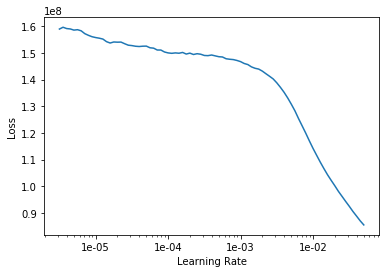

In [82]:
#import matplotlib.pyplot as plt
#%matplotlib inline
learn.recorder.plot()

In [342]:
learn.fit_one_cycle(6, 4e-4, wd=0.2)

epoch,train_loss,valid_loss,mean_absolute_error,time
0,224588.625000,2450118.500000,1189.639526,02:49
1,246409.593750,2461842.250000,1198.248657,02:52
2,221807.500000,2231369.500000,1151.760986,02:56
3,260768.296875,2263154.750000,1149.410522,02:57
4,339583.093750,2365407.750000,1180.717773,02:58
5,298914.875000,2329027.250000,1176.230957,03:00
6,253039.328125,2160480.750000,1132.467163,03:00
7,239490.390625,2582893.250000,1218.835571,03:02
8,213683.437500,2162576.500000,1132.567871,03:16
9,173545.734375,2250416.250000,1145.837280,03:03


In [83]:
learn.fit_one_cycle(1, 4e-4, wd=0.2)

epoch,train_loss,valid_loss,mean_absolute_error,time
0,778279.625000,2646097.000000,1308.030518,02:43


In [343]:
learn.save('1')

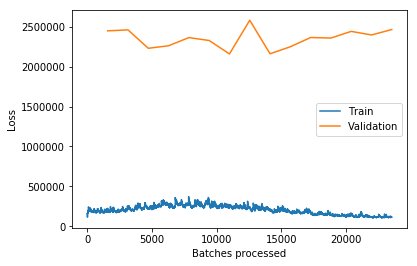

In [344]:
learn.recorder.plot_losses()

In [352]:
learn.load('1');

In [346]:
learn.fit_one_cycle(6, 3e-4)

epoch,train_loss,valid_loss,mean_absolute_error,time
0,165615.109375,2338660.500000,1152.103271,03:01
1,215228.390625,2309487.250000,1159.095825,03:15
2,206901.656250,2210177.250000,1117.933350,03:11
3,150979.062500,2343226.250000,1169.857422,03:14
4,140408.859375,2516216.750000,1197.743530,03:07
5,108072.585938,2473835.500000,1186.167236,03:14


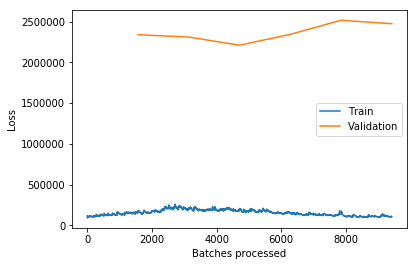

In [347]:
learn.recorder.plot_losses()

In [ ]:
learn.fit_one_cycle(5, 3e-4)

epoch,train_loss,valid_loss,exp_rmspe
1,0.011840,0.013236,0.110483
2,0.010765,0.057664,0.129586
3,0.010101,0.042744,0.111584
4,0.008820,0.116893,0.135458
5,0.009144,0.017969,0.126323


(10th place in the competition was 0.108)

In [ ]:
test_preds=learn.get_preds(DatasetType.Test)
test_df["Sales"]=np.exp(test_preds[0].data).numpy().T[0]
test_df[["Id","Sales"]]=test_df[["Id","Sales"]].astype("int")
test_df[["Id","Sales"]].to_csv("rossmann_submission.csv",index=False)

In [84]:
learn2 = tabular_learner(data, layers=[1000,500,200], ps=[0.09,0.5,0.5], emb_drop=0.04, 
                        #y_range=y_range, metrics=explained_variance)
                        y_range=y_range, metrics=mae)

In [85]:
learn2.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(175, 29)
    (1): Embedding(8, 5)
    (2): Embedding(4, 3)
    (3): Embedding(13, 7)
    (4): Embedding(32, 11)
    (5): Embedding(3, 3)
    (6): Embedding(3, 3)
    (7): Embedding(5, 4)
    (8): Embedding(3, 3)
    (9): Embedding(12, 6)
    (10): Embedding(54, 15)
    (11): Embedding(367, 44)
    (12): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.04)
  (bn_cont): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=140, out_features=1000, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.09)
    (4): Linear(in_features=1000, out_features=500, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.5)
    (8): Linear(in_features=500, out_features=200, bias=True)
    (9):

## Plots:

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


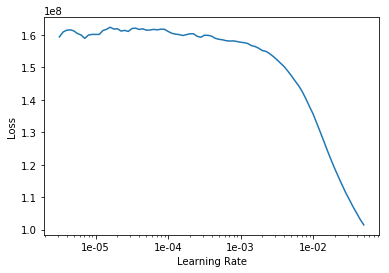

In [86]:
learn2.lr_find(start_lr=1e-6, end_lr=0.1, wd=0.5)
learn2.recorder.plot()

In [113]:
learn2.fit_one_cycle(2, 1e-2, wd=0.5, div_factor=10)

epoch,train_loss,valid_loss,mean_absolute_error,time
0,1653461.250000,2905619.250000,1377.647949,02:56
1,822542.062500,2607245.250000,1312.510864,02:57


## Get Predictions:

https://docs.fast.ai/basic_train.html#Learner.get_preds
Return predictions and targets on ds_type dataset.
The first element of the tuple is a tensor that contains all the predictions.
The second element of the tuple is a tensor that contains all the target labels.
To also get prediction loss (3rd tensor) along with the predictions and the targets, set with_loss=True in the arguments.
DatasetType: Enum = [Train, Valid, Test, Single, Fix]
y_pred[0].data

In [88]:
y_pred=learn2.get_preds(DatasetType.Valid,with_loss=True) #0.792515

In [89]:
y_pred

[tensor([[3968.2031],
         [5016.3999],
         [5204.3936],
         ...,
         [ 380.8044],
         [3759.1304],
         [3545.3110]]),
 tensor([5605., 6635., 5981.,  ...,    0., 2541., 2668.]),
 tensor([2679104.0000, 2619866.2500,  603117.5625,  ...,  145012.0312,
         1483841.6250,  769674.6250])]

In [90]:
y_pred[0].data

tensor([[3968.2031],
        [5016.3999],
        [5204.3936],
        ...,
        [ 380.8044],
        [3759.1304],
        [3545.3110]])

In [91]:
y_pred[0]

tensor([[3968.2031],
        [5016.3999],
        [5204.3936],
        ...,
        [ 380.8044],
        [3759.1304],
        [3545.3110]])

In [94]:
y_pred=learn2.get_preds(DatasetType.Valid)
EVv=explained_variance_score(y_pred[1], y_pred[0])
print(EVv)
MAEv=mean_absolute_error(y_pred[1], y_pred[0])
print(MAEv)
#MSEv=mean_squared_error(validBench_y, y_pred)
MSEv=mean_squared_error(y_pred[1].data, y_pred[0].data)
MSEv

0.6642938256263733
1207.442


2222956.8

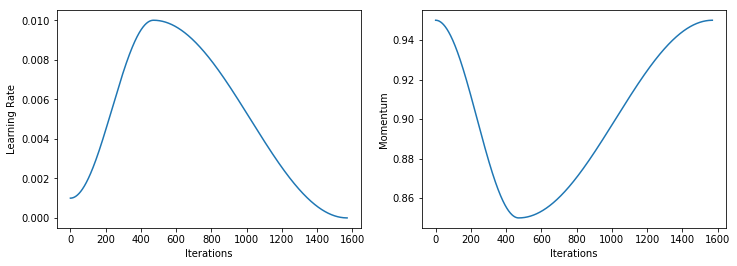

In [51]:
learn2.recorder.plot_lr(show_moms=True)

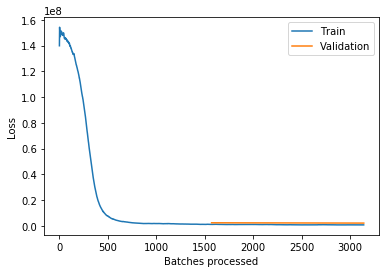

In [414]:
learn2.recorder.plot_losses()

In [131]:
print(learn2.recorder.val_losses)
print(learn2.recorder.val_losses[-1:][0])
float(learn2.recorder.metrics[-1:][0][0])

[2905619.2, 2607245.2]
2607245.2


1312.5108642578125

# Using Hyperopt:

In [31]:
from hyperopt import fmin, tpe, hp
from hyperopt.hp import choice
from skopt import gp_minimize
import fastai
from fastprogress import force_console_behavior
import fastprogress


Space = [
    [500,1000,1100], #'layer1'
    [50,100,250,500,1000], #'layer2'
    [50,100,250,500,1000], #layer 3
        #{'ps': hp.uniform('ps',0,1)},
    [5e-4,1e-3,5e-3,1e-2], #lr
    [0.2,0.4,0.5,0.6], #wd
    [8,10,12,15,25], #div_factor
    [0.09,0.08,0.1], #ps1 x[6]
    [0.5,0.4,0.6], #ps2
    [0.5,0.4,0.6], #ps3
    [0.04,0.03,0.05] #emb_drop
]

xc=0;xb=0;

def objective(x):
    print(x)
    # suppress widgets
#     fastprogress.fastprogress.NO_BAR = True
#     master_bar, progress_bar = force_console_behavior()
#     fastai.basic_train.master_bar, fastai.basic_train.progress_bar = master_bar, progress_bar
#     fastprogress.fastprogress.WRITER_FN = str
    
    # learn using params from hyperopt
    random_seed(0)
    learn2 = tabular_learner(data, layers=[int(x[0]),int(x[1]),int(x[2])], ps=[x[6],x[7],x[8]], emb_drop=x[9], 
                        #y_range=y_range, metrics=explained_variance)
                        y_range=y_range, metrics=mae)
    learn2.fit_one_cycle(1, x[3], wd=x[4], div_factor=int(x[5]))

    return float(learn2.recorder.metrics[-1:][0][0])

# best = fmin(objective,
#     space=Space,
#     algo=tpe.suggest,
#     max_evals=2)

In [32]:
best=gp_minimize(objective, Space, n_calls=75, random_state=0)
print(best)

[1000, 1000, 1000, 0.01, 0.5, 10, 0.09, 0.5, 0.5, 0.03]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,688727.375000,2789954.500000,1346.940552,02:51


[1100, 250, 100, 0.01, 0.4, 15, 0.08, 0.6, 0.5, 0.05]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1104406.625000,2203089.250000,1222.422607,01:31


[1000, 1000, 250, 0.005, 0.5, 12, 0.08, 0.6, 0.5, 0.03]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,773990.312500,2354254.500000,1234.035034,02:18


[500, 500, 100, 0.0005, 0.4, 8, 0.09, 0.4, 0.6, 0.03]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,2566485.250000,2062796.125000,1120.466919,01:18


[1000, 1000, 50, 0.01, 0.5, 8, 0.08, 0.6, 0.4, 0.04]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1276933.125000,2325077.500000,1255.606201,02:04


[500, 500, 1000, 0.005, 0.5, 25, 0.08, 0.4, 0.4, 0.03]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,760844.562500,2221316.250000,1199.322632,01:54


[1000, 500, 100, 0.01, 0.6, 15, 0.09, 0.4, 0.6, 0.05]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1255008.000000,2189372.500000,1216.012695,01:42


[1100, 250, 50, 0.001, 0.2, 12, 0.1, 0.4, 0.4, 0.05]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1704375.125000,1968327.125000,1128.338501,01:27


[1100, 1000, 100, 0.005, 0.6, 12, 0.1, 0.6, 0.5, 0.04]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1191669.000000,2323434.500000,1263.983276,02:15


[500, 1000, 500, 0.01, 0.4, 10, 0.08, 0.5, 0.4, 0.04]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,752191.375000,2427047.750000,1250.370239,02:05


[1000.0, 50.0, 100.0, 0.005, 0.4, 8.0, 0.08, 0.4, 0.4, 0.03]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,929512.375000,2242007.250000,1217.476685,01:07


[500.0, 250.0, 500.0, 0.001, 0.2, 12.0, 0.1, 0.4, 0.6, 0.03]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1254691.000000,2014910.375000,1123.746216,01:20


[1000.0, 250.0, 50.0, 0.001, 0.2, 8.0, 0.09, 0.4, 0.6, 0.03]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,2195590.000000,2198689.500000,1199.568848,01:24


[500.0, 250.0, 1000.0, 0.0005, 0.5, 12.0, 0.1, 0.4, 0.4, 0.03]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1297538.125000,1898292.875000,1092.347534,01:32


[500.0, 250.0, 1000.0, 0.0005, 0.5, 25.0, 0.1, 0.4, 0.4, 0.04]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1282320.250000,1913907.250000,1093.372803,01:34


c:\program files\python36\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[500.0, 250.0, 1000.0, 0.0005, 0.5, 25.0, 0.1, 0.4, 0.4, 0.04]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1282320.250000,1913907.250000,1093.372803,01:35


[500.0, 250.0, 250.0, 0.0005, 0.5, 10.0, 0.1, 0.5, 0.4, 0.04]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1622164.750000,2082129.000000,1121.314209,01:14


c:\program files\python36\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[500.0, 250.0, 1000.0, 0.0005, 0.5, 25.0, 0.1, 0.4, 0.4, 0.04]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1282320.250000,1913907.250000,1093.372803,01:31


[1000.0, 250.0, 1000.0, 0.01, 0.4, 25.0, 0.1, 0.6, 0.5, 0.03]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,780803.125000,2207900.250000,1195.877686,01:44


[500.0, 250.0, 250.0, 0.0005, 0.5, 25.0, 0.1, 0.5, 0.4, 0.04]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1620574.000000,1957900.500000,1091.850098,01:13


[1100.0, 250.0, 50.0, 0.0005, 0.2, 12.0, 0.1, 0.4, 0.5, 0.03]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,2745167.250000,1981202.375000,1094.335327,01:30


[500.0, 250.0, 250.0, 0.0005, 0.5, 10.0, 0.1, 0.4, 0.4, 0.04]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1594898.125000,1987326.000000,1109.230591,01:15


[1100.0, 250.0, 500.0, 0.0005, 0.5, 8.0, 0.1, 0.4, 0.4, 0.04]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1350717.750000,2037305.500000,1145.554443,01:45


c:\program files\python36\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[500.0, 250.0, 250.0, 0.0005, 0.5, 10.0, 0.1, 0.5, 0.4, 0.04]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1622164.750000,2082129.000000,1121.314209,01:15


[500.0, 250.0, 50.0, 0.0005, 0.6, 12.0, 0.1, 0.5, 0.4, 0.04]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,2457507.750000,2098365.750000,1182.765869,01:07


[1100.0, 100.0, 50.0, 0.0005, 0.2, 10.0, 0.08, 0.5, 0.5, 0.04]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,5381947.500000,2738773.500000,1262.707642,01:12


[1100.0, 250.0, 250.0, 0.001, 0.5, 10.0, 0.1, 0.4, 0.6, 0.05]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1319634.625000,2072805.500000,1172.477539,01:31


[500.0, 250.0, 100.0, 0.005, 0.2, 15.0, 0.1, 0.5, 0.6, 0.04]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1185130.625000,2157939.500000,1186.709961,01:08


[1100.0, 50.0, 250.0, 0.005, 0.2, 8.0, 0.09, 0.5, 0.5, 0.03]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,933235.437500,2098769.000000,1157.125977,01:16


[1000.0, 100.0, 50.0, 0.005, 0.4, 10.0, 0.1, 0.4, 0.6, 0.03]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1325546.750000,2311137.500000,1230.137573,01:11


[500.0, 250.0, 1000.0, 0.0005, 0.5, 25.0, 0.1, 0.4, 0.4, 0.05]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1303400.125000,1939697.750000,1108.568359,01:30


[500.0, 100.0, 1000.0, 0.005, 0.6, 15.0, 0.09, 0.4, 0.4, 0.04]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,673579.875000,2299821.000000,1211.077515,01:18


[500.0, 500.0, 50.0, 0.01, 0.5, 8.0, 0.1, 0.4, 0.5, 0.05]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1256723.875000,2373600.000000,1263.550293,01:16


[1100.0, 250.0, 1000.0, 0.0005, 0.4, 25.0, 0.1, 0.4, 0.4, 0.03]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1263805.375000,1926757.875000,1089.112183,01:51


[1000.0, 250.0, 100.0, 0.0005, 0.2, 25.0, 0.1, 0.6, 0.5, 0.03]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,2498925.750000,2065382.500000,1118.238647,01:22


[1000.0, 250.0, 100.0, 0.0005, 0.4, 25.0, 0.1, 0.6, 0.6, 0.05]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,2956374.500000,2087782.375000,1128.574585,01:24


[1100.0, 250.0, 1000.0, 0.0005, 0.2, 10.0, 0.1, 0.4, 0.6, 0.03]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1478277.000000,1976289.250000,1102.320190,01:52


[1100.0, 250.0, 1000.0, 0.0005, 0.5, 15.0, 0.1, 0.4, 0.5, 0.03]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1323449.500000,1928997.250000,1101.340576,01:48


[1100.0, 250.0, 1000.0, 0.0005, 0.2, 8.0, 0.1, 0.6, 0.6, 0.03]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1578983.750000,1976823.125000,1100.571655,01:51


[1100.0, 250.0, 1000.0, 0.0005, 0.4, 25.0, 0.1, 0.4, 0.5, 0.03]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1317447.875000,1983683.750000,1105.490601,01:50


[1100.0, 250.0, 1000.0, 0.0005, 0.2, 15.0, 0.1, 0.4, 0.5, 0.03]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1407012.750000,1854469.875000,1057.550781,01:48


[1100.0, 250.0, 500.0, 0.0005, 0.2, 15.0, 0.1, 0.4, 0.6, 0.03]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1666955.625000,1981831.250000,1119.384399,01:40


[1000.0, 250.0, 1000.0, 0.0005, 0.2, 15.0, 0.1, 0.4, 0.5, 0.05]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1491537.625000,2060097.875000,1132.421509,01:42


[1100.0, 500.0, 1000.0, 0.0005, 0.2, 25.0, 0.09, 0.5, 0.4, 0.05]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1317209.750000,1942109.250000,1108.893555,02:16


[1000.0, 500.0, 500.0, 0.0005, 0.6, 15.0, 0.1, 0.6, 0.5, 0.04]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1575089.750000,2055789.125000,1158.357056,01:57


[1100.0, 1000.0, 250.0, 0.0005, 0.6, 12.0, 0.09, 0.6, 0.4, 0.05]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1381574.875000,2135962.750000,1193.590820,02:21


[1100.0, 250.0, 1000.0, 0.0005, 0.4, 15.0, 0.09, 0.6, 0.5, 0.03]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1473387.000000,2021996.500000,1132.598389,01:58


[1100.0, 100.0, 1000.0, 0.01, 0.4, 10.0, 0.1, 0.6, 0.5, 0.05]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,758560.875000,2349289.500000,1230.405151,01:29


[500.0, 1000.0, 100.0, 0.001, 0.2, 12.0, 0.1, 0.6, 0.6, 0.04]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1613067.625000,2060113.750000,1163.950195,01:43


[1100.0, 50.0, 1000.0, 0.01, 0.2, 15.0, 0.1, 0.5, 0.5, 0.05]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,844590.937500,2295483.250000,1205.614258,01:27


[1000.0, 100.0, 100.0, 0.001, 0.5, 25.0, 0.09, 0.6, 0.6, 0.04]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1834103.875000,2249145.250000,1209.236084,01:13


[1100.0, 250.0, 1000.0, 0.0005, 0.2, 10.0, 0.08, 0.4, 0.6, 0.03]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1513565.125000,2001780.500000,1111.307251,01:52


[500.0, 500.0, 1000.0, 0.001, 0.6, 8.0, 0.09, 0.4, 0.6, 0.05]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1021338.500000,1950804.375000,1120.934814,01:56


[1100.0, 500.0, 50.0, 0.001, 0.2, 15.0, 0.08, 0.5, 0.4, 0.03]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1497323.625000,2081029.375000,1154.499146,01:40


[500.0, 50.0, 50.0, 0.001, 0.5, 15.0, 0.08, 0.4, 0.6, 0.03]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,2518912.500000,2147236.750000,1167.850708,00:58


[1100.0, 50.0, 500.0, 0.0005, 0.2, 10.0, 0.08, 0.5, 0.4, 0.04]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1590379.875000,2115723.500000,1167.624512,01:18


[1100.0, 250.0, 1000.0, 0.0005, 0.6, 8.0, 0.08, 0.4, 0.5, 0.03]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1214495.625000,1957882.750000,1099.762329,01:51


[1100.0, 250.0, 1000.0, 0.0005, 0.5, 25.0, 0.08, 0.4, 0.6, 0.03]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1459264.625000,2048266.250000,1134.071167,01:52


[1100.0, 250.0, 1000.0, 0.0005, 0.2, 8.0, 0.08, 0.4, 0.5, 0.05]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1353290.875000,1954093.125000,1093.957886,01:50


[1100.0, 250.0, 1000.0, 0.0005, 0.2, 8.0, 0.09, 0.6, 0.5, 0.03]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1519556.625000,2052885.750000,1130.325684,01:49


[500.0, 250.0, 100.0, 0.0005, 0.4, 25.0, 0.08, 0.4, 0.5, 0.03]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,2137379.500000,1898931.625000,1097.807983,01:10


[1000.0, 250.0, 250.0, 0.0005, 0.2, 25.0, 0.09, 0.4, 0.5, 0.05]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1835672.000000,1888025.500000,1101.697266,01:27


c:\program files\python36\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[500.0, 250.0, 100.0, 0.0005, 0.4, 25.0, 0.08, 0.4, 0.5, 0.03]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,2137379.500000,1898931.625000,1097.807983,01:08


[1000.0, 250.0, 100.0, 0.0005, 0.4, 10.0, 0.08, 0.4, 0.5, 0.03]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,2198500.500000,1981865.000000,1100.237061,01:23


[1000.0, 250.0, 100.0, 0.0005, 0.2, 15.0, 0.08, 0.4, 0.5, 0.03]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,2367265.500000,2114353.500000,1132.648926,01:25


[1100.0, 250.0, 250.0, 0.0005, 0.4, 8.0, 0.09, 0.4, 0.6, 0.05]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1927624.250000,1978431.000000,1140.510254,01:41


[500.0, 250.0, 1000.0, 0.0005, 0.4, 25.0, 0.08, 0.6, 0.5, 0.03]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1586184.500000,1914105.875000,1080.042114,01:31


[500.0, 250.0, 500.0, 0.0005, 0.4, 25.0, 0.08, 0.6, 0.5, 0.03]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1596818.000000,2031926.750000,1120.544067,01:19


[500.0, 250.0, 1000.0, 0.0005, 0.5, 12.0, 0.08, 0.4, 0.5, 0.03]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1352505.875000,1922889.750000,1092.815186,01:30


[500.0, 250.0, 1000.0, 0.0005, 0.4, 15.0, 0.08, 0.6, 0.5, 0.03]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1511122.375000,1878103.750000,1070.550049,01:31


[500.0, 250.0, 500.0, 0.0005, 0.4, 25.0, 0.08, 0.6, 0.5, 0.05]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1593591.375000,2016464.125000,1112.438843,01:20


[500.0, 250.0, 1000.0, 0.0005, 0.5, 15.0, 0.08, 0.6, 0.5, 0.03]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1481462.000000,1895770.875000,1089.051147,01:33


[500.0, 250.0, 1000.0, 0.0005, 0.6, 15.0, 0.09, 0.6, 0.5, 0.03]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1516744.625000,1998453.500000,1114.306274,01:32


[500.0, 250.0, 1000.0, 0.0005, 0.4, 15.0, 0.08, 0.4, 0.5, 0.03]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1396522.000000,1910541.125000,1090.510254,01:31


[1100.0, 250.0, 1000.0, 0.0005, 0.4, 15.0, 0.08, 0.6, 0.5, 0.03]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1439736.000000,1999592.750000,1122.880127,01:51


          fun: 1057.55078125
    func_vals: array([1346.940552, 1222.422607, 1234.035034, 1120.466919, ..., 1089.051147, 1114.306274, 1090.510254, 1122.880127])
       models: [GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1**2 * HammingKernel(0, 0, 0, 0, 0, 0, 0, 0, 0, 0) + WhiteKernel(noise_level=1),
             n_restarts_optimizer=2, noise='gaussian', normalize_y=True,
             optimizer='fmin_l_bfgs_b', random_state=209652396), GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1**2 * HammingKernel(0, 0, 0, 0, 0, 0, 0, 0, 0, 0) + WhiteKernel(noise_level=1),
             n_restarts_optimizer=2, noise='gaussian', normalize_y=True,
             optimizer='fmin_l_bfgs_b', random_state=209652396), GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1**2 * HammingKernel(0, 0, 0, 0, 0, 0, 0, 0, 0, 0) + WhiteKernel(noise_level=1),
             n_restarts_optimizer=2, noise='gaussian', normalize_y=True,


      x_iters: [[1000, 1000, 1000, 0.01, 0.5, 10, 0.09, 0.5, 0.5, 0.03], [1100, 250, 100, 0.01, 0.4, 15, 0.08, 0.6, 0.5, 0.05], [1000, 1000, 250, 0.005, 0.5, 12, 0.08, 0.6, 0.5, 0.03], [500, 500, 100, 0.0005, 0.4, 8, 0.09, 0.4, 0.6, 0.03], [1000, 1000, 50, 0.01, 0.5, 8, 0.08, 0.6, 0.4, 0.04], [500, 500, 1000, 0.005, 0.5, 25, 0.08, 0.4, 0.4, 0.03], [1000, 500, 100, 0.01, 0.6, 15, 0.09, 0.4, 0.6, 0.05], [1100, 250, 50, 0.001, 0.2, 12, 0.1, 0.4, 0.4, 0.05], [1100, 1000, 100, 0.005, 0.6, 12, 0.1, 0.6, 0.5, 0.04], [500, 1000, 500, 0.01, 0.4, 10, 0.08, 0.5, 0.4, 0.04], [1000.0, 50.0, 100.0, 0.005, 0.4, 8.0, 0.08, 0.4, 0.4, 0.03], [500.0, 250.0, 500.0, 0.001, 0.2, 12.0, 0.1, 0.4, 0.6, 0.03], [1000.0, 250.0, 50.0, 0.001, 0.2, 8.0, 0.09, 0.4, 0.6, 0.03], [500.0, 250.0, 1000.0, 0.0005, 0.5, 12.0, 0.1, 0.4, 0.4, 0.03], [500.0, 250.0, 1000.0, 0.0005, 0.5, 25.0, 0.1, 0.4, 0.4, 0.04], [500.0, 250.0, 1000.0, 0.0005, 0.5, 25.0, 0.1, 0.4, 0.4, 0.04], [500.0, 250.0, 250.0, 0.0005, 0.5, 10.0, 0.1, 0.5, 0

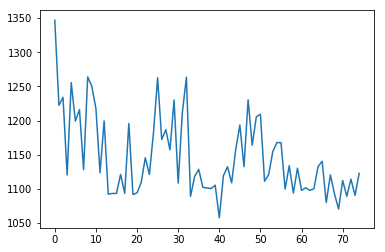

In [51]:
import matplotlib.pyplot as plt
plt.plot(range(len(best.func_vals)),best.func_vals)

In [34]:
best.x
#[1100, 250, 1000, 0.0005, 0.2, 15, 0.1, 0.4, 0.5, 0.03]

[1100.0, 250.0, 1000.0, 0.0005, 0.2, 15.0, 0.1, 0.4, 0.5, 0.03]

In [33]:
best.fun

1057.55078125

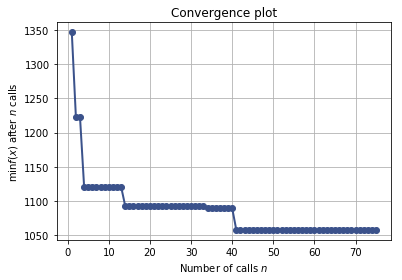

In [42]:
from skopt.plots import plot_convergence
plot_convergence(best)

KeyboardInterrupt: 

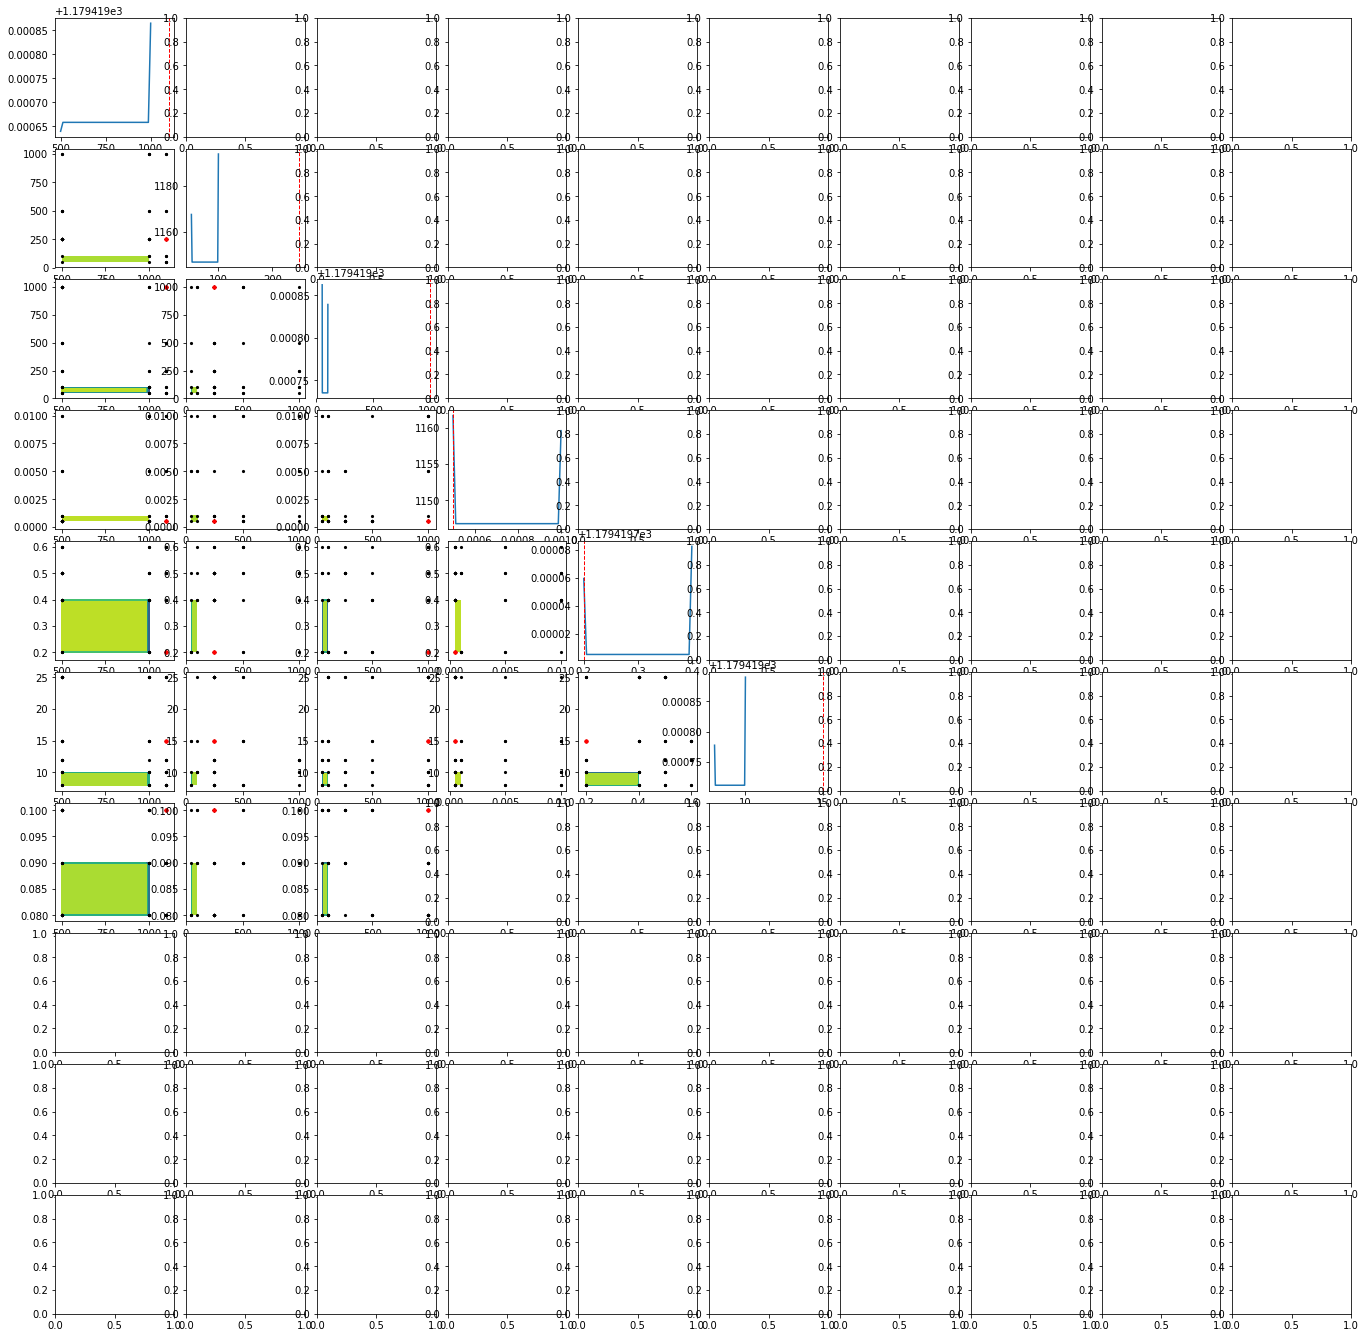

In [45]:
import skopt.plots
_ = skopt.plots.plot_objective(best, levels=3)

ValueError: too many values to unpack (expected 2)

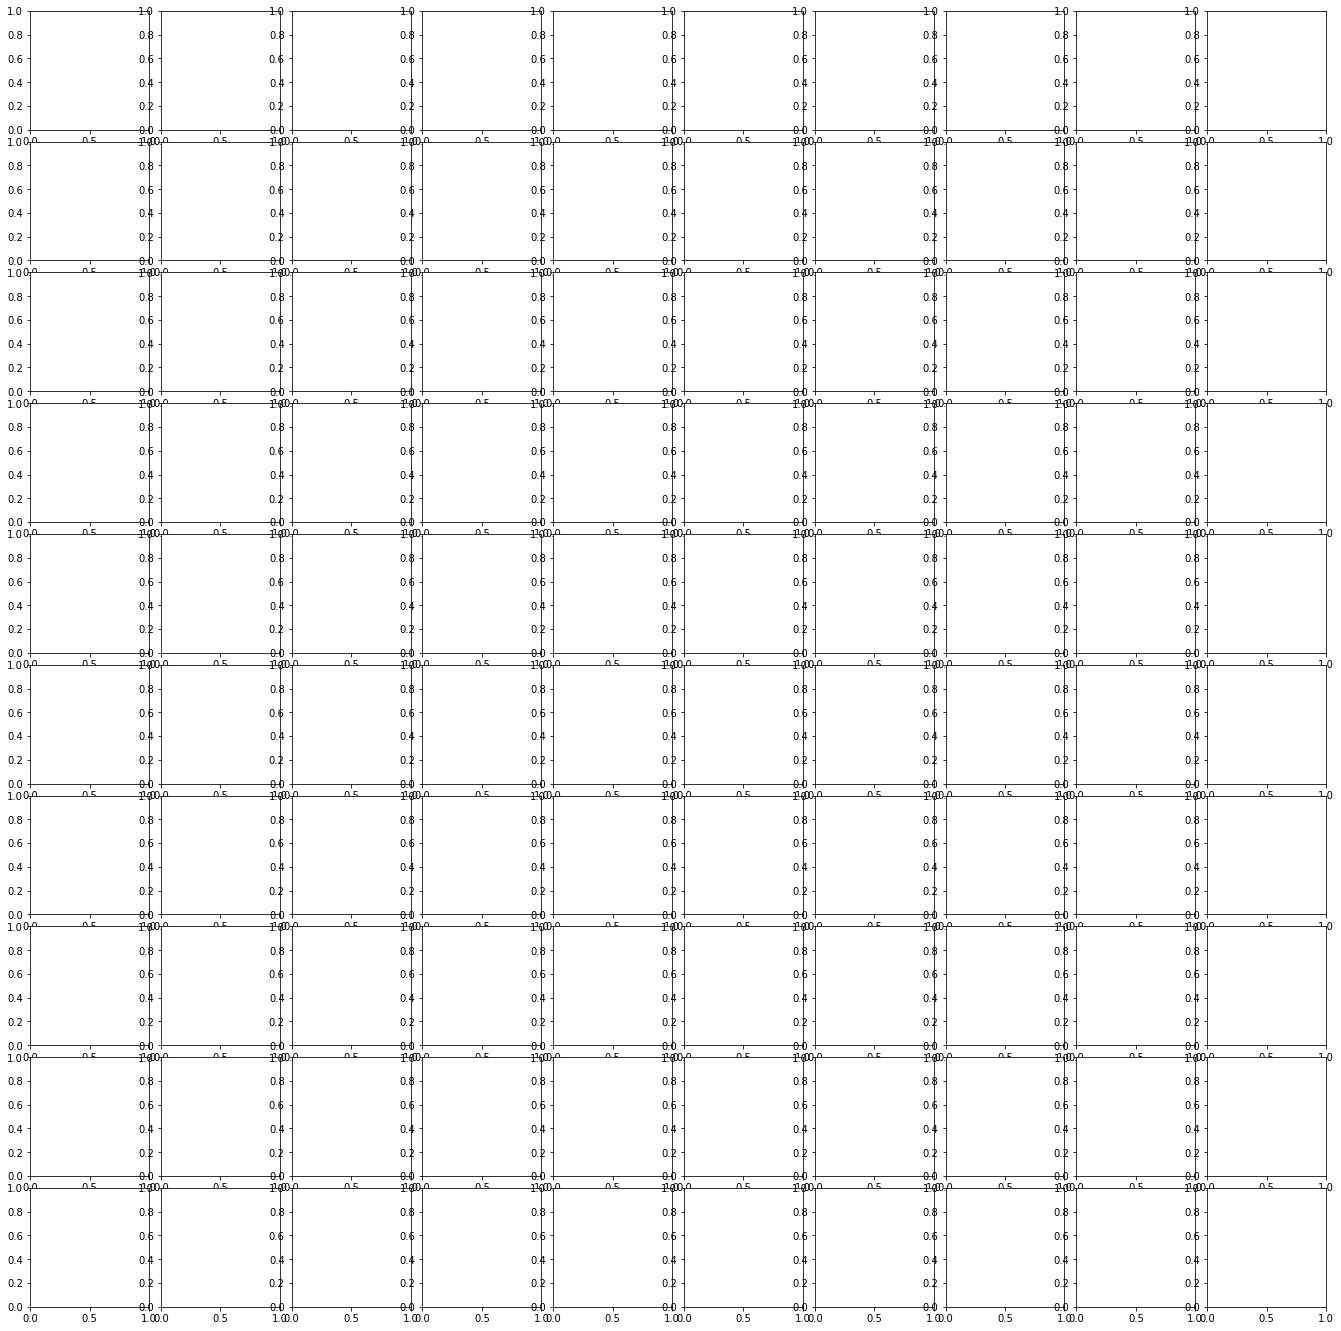

In [46]:
from skopt.plots import plot_evaluations
_ = plot_evaluations(best)

In [134]:
best

          fun: 1087.251708984375
    func_vals: array([1253.550049, 1185.695557, 1214.476318, 1211.067993, 1198.736572, 1087.251709, 1157.464233, 1114.233276,
       1196.921875, 1223.354004])
       models: [GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1**2 * HammingKernel(0, 0, 0, 0, 0, 0) + WhiteKernel(noise_level=1),
             n_restarts_optimizer=2, noise='gaussian', normalize_y=True,
             optimizer='fmin_l_bfgs_b', random_state=209652396)]
 random_state: <mtrand.RandomState object at 0x00000000489795A0>
        space: Space([Categorical(categories=(500, 1000, 1100), prior=None),
       Categorical(categories=(50, 100, 250, 500, 1000), prior=None),
       Categorical(categories=(50, 100, 250, 500, 1000), prior=None),
       Categorical(categories=(0.0005, 0.001, 0.005, 0.01), prior=None),
       Categorical(categories=(0.2, 0.4, 0.5, 0.6), prior=None),
       Categorical(categories=(8, 10, 12, 15, 25), prior=None)])
        specs: {'args'

In [135]:
best.fun

1087.251708984375

In [136]:
best.func_vals

array([1253.550049, 1185.695557, 1214.476318, 1211.067993, 1198.736572, 1087.251709, 1157.464233, 1114.233276,
       1196.921875, 1223.354004])

In [137]:
best.x #1139.558960

[500, 500, 100, 0.0005, 0.4, 8]

In [40]:
#x=best.x
random_seed(0)
x=[1100, 250, 1000, 0.0005, 0.2, 15, 0.1, 0.4, 0.5, 0.03]
print(x)
learn3 = tabular_learner(data, layers=[int(x[0]),int(x[1]),int(x[2])], ps=[x[6],x[7],x[8]], emb_drop=x[9], 
                    #y_range=y_range, metrics=explained_variance)
                    y_range=y_range, metrics=mae)
learn3.fit_one_cycle(1, x[3], wd=x[4], div_factor=int(x[5]))

[1100, 250, 1000, 0.0005, 0.2, 15, 0.1, 0.4, 0.5, 0.03]


epoch,train_loss,valid_loss,mean_absolute_error,time
0,1407012.750000,1854469.875000,1057.550781,02:00


In [106]:
learn3.validate()

[1854469.9, tensor(1057.5508)]

In [76]:
data.train_ds.inner_df.shape

(100554, 18)

# Pattern Search:

## Enabling and Disabling the Status Bar:

In [16]:
import fastai
import fastprogress

#     fastprogress.fastprogress.NO_BAR = True
#     master_bar, progress_bar = force_console_behavior()
#     fastai.basic_train.master_bar, fastai.basic_train.progress_bar = master_bar, progress_bar
#     fastprogress.fastprogress.WRITER_FN = str

def disable_progress():
    fastprogress.fastprogress.NO_BAR = True
    master_bar, progress_bar = fastprogress.force_console_behavior()
    fastai.basic_train.master_bar, fastai.basic_train.progress_bar = master_bar, progress_bar
    fastprogress.fastprogress.WRITER_FN = str
    
def enable_progress():
    #fastprogress.fastprogress.NO_BAR=False
    fastai.basic_train.master_bar, fastai.basic_train.progress_bar = fastprogress.master_bar, fastprogress.progress_bar
    
enable_progress()

## Cross Eval and Score 3AI:

In [28]:
#Defining Insert Values and Header
import platform
import sys
OpSys=platform.system()[:3]
print(OpSys)
OpSysVer=platform.release()
print(OpSysVer)
LangVer=sys.version[:5]
print(LangVer)
import sklearn
Lib='Fast.ai'
print(Lib)
LibVer= sklearn.__version__
print(LibVer)

from openpyxl import load_workbook
workbook_name = 'C:\\Benchmarking\\AlgoPerf.xlsx'
def xlsADD(row):
    wb = load_workbook(workbook_name)
    page = wb.active
    page.append(row)
    wb.save(filename=workbook_name) 

def InsertHeader():
    Result=('OpSys','OpVer', 
            'Lang', 
            'LangVer', 
            'Lib', 
            'Lib.Ver', 
            'Algo',
            'M_FitTime', 
            'XVR_FitTime',
            'XVR_ScorTime',
            'XV_Time',
            'XV_EV',
            'XV_MAE', 
            'XV_MSE', 
            'XV_RMSE', 
            'XV_R2',
            'TS_PredTime',
            'TS_EV',
            'TS_MAE', 
            'TS_MSE', 
            'TS_RMSE', 
            'TS_R2',
            'MeanEV',
            'MdlParam', 
            'FeatImp',
            'TdTypes',
            'Comments')
    #print(Result)
    xlsADD(Result)
    
def InsertValues():
    Result=(OpSys, 
            OpSysVer, 
            'Python', 
            LangVer, 
            Lib, 
            LibVer,
            Algo,
            M_FitTime, 
            XVR_FT,
            ST,
            XValidTime,
            EV,
            MAE, 
            MSE, 
            RMSE, 
            R2,
            PredTime,
            EVv,
            MAEv, 
            MSEv, 
            RMSEv, 
            R2v,
            EVtot.mean(),
            str(Params), 
            str(d),
            str(TrainDataTypes),
            Comments)
    #print(Result)
    xlsADD(Result)

Win
7
3.6.7
Fast.ai
0.20.2


In [29]:
#Cross Validate and Score 3 def function:
params={}
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

import csv
import sys
import time
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import gc


def CrossEval3(data:DataBunch, SplitPercent=20, mp={}, verbose=False,
               AlgName="", Comment="", metrics=mae, Retrain=False, Epochs=1):
    global Algo
    Algo='Fast.ai Tabular'
    print("Current Model: ", Algo)
       
    X=data.train_ds.inner_df
    global TrainDataTypes
    TrainDataTypes=X.dtypes
    Nrows,_ =X.shape
    SplitPoint=int(Nrows*(SplitPercent/100))
    X = X.iloc[:SplitPoint, :]
    #if verbose: 
    print("Training data set shape:",X.shape)
    
    global M_FitTime, XValidTime, PredTime
    global EV, MAE, MSE, RMSE, R2, XVR_FT, ST 
    
    EVar=[]; MAEar=[]; MSEar=[]; R2ar=[]; RMSEar=[];XVR_FTar=[]

    # time series cross validation manually
    M_FitTime=0
    
    #suppress widgets
    disable_progress()
    
    tscv = TimeSeriesSplit(n_splits=5)
    
#    Xcols=list(set(X.names)-set('NumberOfSales'))
    dep_var='NumberOfSales'
    path="c:/Benchmarking/trainBench.csv"
    start=time.time() 
    global learn
    for train_index, val_index in tscv.split(X):
        #print("TRAIN:", train_index, "TEST:", val_index)
        #train = X[min(train_index):max(train_index),:]
        #test = X[min(test_index):max(test_index),:]
        print(len(train_index),len(val_index))
        random_seed(0) #must be called before the first fit
        data_fold = (TabularList.from_df(X, cat_names=cat_vars, cont_names=cont_vars, procs=procs,)
                .split_by_idx(val_index)
                .label_from_df(cols=dep_var, label_cls=FloatList, log=False)
                .databunch(num_workers=0))
        #random_seed(0)
        learn = tabular_learner(data_fold, layers=[int(mp['layer1']),int(mp['layer2'])
                               #,int(mp['layer3'])
                               ], 
                               ps=[mp['ps1'],mp['ps2']
                               #,mp['ps3']
                               ], emb_drop=mp['emb_drop'], 
                               y_range=y_range, metrics=metrics)
        XVR_FT = time.time()
        learn.fit_one_cycle(Epochs, mp['lr'], wd=mp['wd'], div_factor=int(mp['div_factor']))
        XVR_FT = time.time()-XVR_FT
        
        
        y_pred=learn.get_preds(DatasetType.Valid)
        EVar.append(explained_variance_score(y_pred[1], y_pred[0]))
        MAEar.append(mean_absolute_error(y_pred[1], y_pred[0]))
        MSEar.append(mean_squared_error(y_pred[1], y_pred[0]))
        R2ar.append(r2_score(y_pred[1], y_pred[0]))
        XVR_FTar.append(XVR_FT)
    
    M_FitTime=XVR_FT
    XValidTime = time.time() - start 
    RMSEar=np.sqrt(np.array(MSEar))
    #XVR_FTar=[0, 0, 0, 0, 0]
    STar=[0, 0, 0, 0, 0]
    
    EV = np.array(EVar).mean()
    MAE=np.array(MAEar).mean()
    MSE=np.array(MSEar).mean()
    RMSE=np.array(RMSEar).mean()
    R2=np.array(R2ar).mean()
    XVR_FT=np.array(XVR_FTar).sum()
    ST=np.array(STar).sum()
    
    if verbose:print("Measured Time for one fit: ", M_FitTime)

    global Params
    Params=str(mp)
    if verbose:print(" "); 

    if verbose:print("Cross Validation Performance: ")
    print("Cross Validation Time: %0.6f" % (XValidTime))
    if verbose:print("EV: %0.6f" % (EV))
    if verbose:print("EV for each Fold:",EVar)
    #MAE is less sensitive to outliers, The contant value that minimizes the MAE is the median of the target values
    if verbose:print("MAE: %0.6f" % (MAE))
    if verbose:print("MAE for each Fold:",MAEar)
    #MAE considers outliers, The contant value that minimizes the MSE is the mean of the target values
    #If you think your outliers are erros in the data use MAE, if you think the outliers are true datapoints use MSE.
    #It is easier to optmize MSE than RMSE because RMSE requires an adjustable learning rate.
    if verbose:print("MSE: %0.6f" % (MSE))
    if verbose:print("MSE for each Fold:",MSEar)
    if verbose:print("RMSE: %0.6f" % (RMSE))
    if verbose:print("RMSE for each Fold:",RMSEar)
    #Optimizing R2 and optimizing for MSE is the same, since R2 = 1-(MSE/Constant)
    if verbose:print("XV R2 Actuals:",R2ar)
    if verbose:print("Cross Validation R2: %0.6f" % (R2))
    if verbose:print("XVR_fit_time Actuals: ", (XVR_FTar))
    if verbose:print("XVR_fit_time: %0.6f" % (XVR_FT))
    if verbose:print("score_time Actuals: ", (STar))      
    if verbose:print("score_time: %0.6f" % (ST))
    disable_progress()
    
    #**************Insert comments about this run here:
    global Comments    
    if Comment=="":
        Comments=str(mp)
    else:
        Comments=Comment
   



    # Score Validation Set: 
    if Retrain:
        random_seed(0)
        learn = tabular_learner(data, layers=[int(mp['layer1']),int(mp['layer2']),
                           int(mp['layer3'])], 
                           ps=[mp['ps1'],mp['ps2'],mp['ps3']], emb_drop=mp['emb_drop'], 
                           y_range=y_range, metrics=metrics)
        learn.fit_one_cycle(Epochs, mp['lr'], wd=mp['wd'], div_factor=int(mp['div_factor']))
    
    start=time.time()
    y_pred=learn.get_preds(data.valid_ds)
    PredTime = time.time() - start

    if verbose:print(" ")
    if verbose:print(" ")
    global EVv, MAEv, MSEv, RMSEv, R2v, EVtot
    if verbose:print("Prediction Time: ", PredTime)
    if verbose:print(" ")
    if verbose:print("Validation data set shape:",data.valid_ds.inner_df.shape)
    EVv=explained_variance_score(y_pred[1], y_pred[0])
    if verbose:print("Validation Set Explained Variance (EV): %0.2f" % (EVv))
    #MAE is less sensitive to outliers, The constant value that minimizes the MAE is the median of the target values
    MAEv=mean_absolute_error(y_pred[1], y_pred[0])
    if verbose:print("MAE: %0.6f" % (MAEv))
    #MAE considers outliers, The constant value that minimizes the MSE is the mean of the target values
    #If you think your outliers are erros in the data use MAE, if you think the outliers are true datapoints use MSE.
    #It is easier to optmize MSE than RMSE because RMSE requires an adjustable learning rate.
    MSEv=mean_squared_error(y_pred[1], y_pred[0])
    if verbose:print("MSE: %0.6f" % (MSEv))
    RMSEv=np.sqrt(MSEv)
    if verbose:print("RMSE: %0.6f" % (RMSEv))
    #Optimizing R2 and optimizing for MSE is the same, since R2 = 1-(MSE/Constant)
    R2v=r2_score(y_pred[1], y_pred[0])
    if verbose:print("Validation Set R2: %0.6f" % (R2v))
    EVtot=EVar.copy()
    EVtot = np.append(EVtot,EVv)
    EVtotMean=EVtot.mean()
    if verbose:print("Total Mean EV: ",EVtot,EVtotMean)
    MAEtot=MAEar.copy()
    MAEtot=np.append(MAEtot,MAEv)
    MAEtotMean=MAEtot.mean()
    if verbose:print("Total Mean MAE: ",MAEtot,MAEtotMean)
    
    if verbose:print("Validation Set EV, XVal EV, Mean EV: ",EVv, EV, EVtotMean)
    global d
    d=""
    enable_progress()
    #InsertHeader()
    InsertValues()
    return EVv, EV, EVtotMean, R2v, R2, -MAE, -MAEv, -MAEtotMean 


In [97]:
enable_progress()

In [23]:
#CrossEval3 test run 2 layers:
Comments="Two layers"

#xc={'layer1': 1300.0, 'layer2': 1000.0, 'layer3': 1000.0, 'lr': 0.006, 'wd': 0.1, 'div_factor': 25.0, 'ps1': 0.11, 'ps2': 0.5, 'ps3': 0.49, 'emb_drop': 0.039}
xc={'layer1': 1400.0, 'layer2': 1200.0, 'lr': 0.008, 'wd': 0.6, 'div_factor': 25.0, 
    'ps1': 0.11, 'ps2': 0.5, 'emb_drop': 0.04}
CrossEval3(data, 5, mp=xc, verbose=True,
           Comment=Comments,
           metrics=mae)

Current Model:  Fast.ai Tabular
Training data set shape: (5027, 18)
842 837
1679 837
2516 837
3353 837
4190 837
Measured Time for one fit:  6.018344402313232
 
Cross Validation Performance: 
Cross Validation Time: 30.023717
EV: 0.490703
EV for each Fold: [0.6253307461738586, 0.7475986480712891, 0.6870673894882202, 0.03943741321563721, 0.3540828227996826]
MAE: 2046.738037
MAE for each Fold: [1016.81555, 1190.5186, 902.9877, 3677.33, 3446.0386]
MSE: 8135925.000000
MSE for each Fold: [2085192.8, 2164606.5, 1539879.1, 18187932.0, 16702015.0]
RMSE: 2501.547852
RMSE for each Fold: [1444.0197 1471.2601 1240.9187 4264.731  4086.8098]
XV R2 Actuals: [0.531320879931481, 0.5611093234491483, 0.6680983472764007, -2.524846057365191, -0.9577003015467311]
Cross Validation R2: -0.344404
XVR_fit_time Actuals:  [5.621321439743042, 5.608320951461792, 5.537316799163818, 5.534316539764404, 6.018344402313232]
XVR_fit_time: 28.319620
score_time Actuals:  [0, 0, 0, 0, 0]
score_time: 0.000000
 
 
Prediction Tim

(0.7619748115539551,
 0.49070340394973755,
 0.5359153052171072,
 0.6919346360184233,
 -0.3444035616509784,
 -2046.738,
 -1068.1729,
 -1883.6439)

In [193]:
#CrossEval3 test run 3 layers:
#Comments="Params found with 20% training data and param_dist = {'layer1':[1200, 1300, 1400], 'layer2':[500,1000,1100,1200], 'layer3':[500,1000,1100,1200], 'lr':[1e-4,3e-3,5e-3,8e-3,1e-2], 'wd':[0.1,0.2,0.3,0.4], 'div_factor':[24,25,26], 'ps1':[0.09,0.095,0.1], 'ps2':[0.5,0.49,0.48], 'ps3':[0.5,0.49,0.48], 'emb_drop':[0.04,0.039,0.38]"
Comments="20% of data, optimizing for XV-MAE"

#xc={'layer1': 1300.0, 'layer2': 1000.0, 'layer3': 1000.0, 'lr': 0.006, 'wd': 0.1, 'div_factor': 25.0, 'ps1': 0.11, 'ps2': 0.5, 'ps3': 0.49, 'emb_drop': 0.039}
xc={'layer1': 1400.0, 'layer2': 1200.0, 'layer3': 1000.0, 'lr': 0.008, 'wd': 0.6, 'div_factor': 25.0, 'ps1': 0.11, 'ps2': 0.5, 'ps3': 0.5, 'emb_drop': 0.04}
CrossEval3(data, 100, mp=xc, verbose=True,
           Comment=Comments,
           metrics=mae)

Current Model:  Fast.ai Tabular
Training data set shape: (100554, 18)
16759 16759
33518 16759
50277 16759
67036 16759
83795 16759
Measured Time for one fit:  184.8225712776184
 
Cross Validation Performance: 
Cross Validation Time: 923.791838
EV: 0.601464
EV for each Fold: [0.757057249546051, 0.5592396259307861, 0.6504535675048828, 0.6429572105407715, 0.3976142406463623]
MAE: 1235.511963
MAE for each Fold: [969.6693, 1368.666, 1232.5692, 1234.8987, 1371.7561]
MSE: 3356365.500000
MSE for each Fold: [1595370.2, 3946769.8, 2475700.2, 2740140.2, 6023848.5]
RMSE: 1786.570679
RMSE for each Fold: [1263.0797 1986.6478 1573.4358 1655.3369 2454.353 ]
XV R2 Actuals: [0.7401073187061312, 0.55760542342705, 0.6445095894860154, 0.6196864095473174, 0.39433742454898213]
Cross Validation R2: 0.591249
XVR_fit_time Actuals:  [163.9153757095337, 176.2500810623169, 174.87100195884705, 190.25988221168518, 184.8225712776184]
XVR_fit_time: 890.118912
score_time Actuals:  [0, 0, 0, 0, 0]
score_time: 0.000000
 


(0.9403016567230225,
 0.6014643788337708,
 0.6579372584819794,
 0.9398827370984433,
 0.5912492331430992,
 -1235.512,
 -465.90454,
 -1107.244)

### Plots:

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


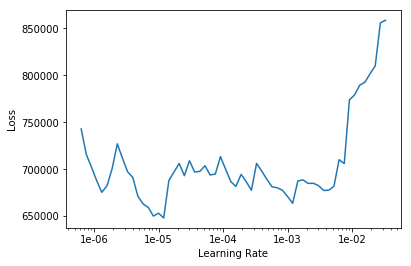

In [165]:
learn.lr_find()
learn.recorder.plot()

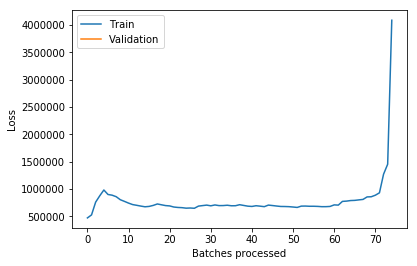

In [166]:
learn.recorder.plot_losses()

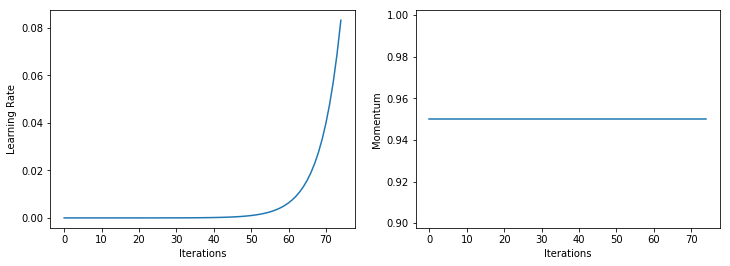

In [167]:
learn.recorder.plot_lr(show_moms=True)

In [169]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(175, 29)
    (1): Embedding(8, 5)
    (2): Embedding(4, 3)
    (3): Embedding(13, 7)
    (4): Embedding(32, 11)
    (5): Embedding(3, 3)
    (6): Embedding(3, 3)
    (7): Embedding(5, 4)
    (8): Embedding(3, 3)
    (9): Embedding(12, 6)
    (10): Embedding(54, 15)
    (11): Embedding(367, 44)
    (12): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.039)
  (bn_cont): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=140, out_features=1300, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(1300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.1)
    (4): Linear(in_features=1300, out_features=1000, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.5)
    (8): Linear(in_features=1000, out_features=1000, bias=True)
    

## Pattern Search Definition:

In [25]:
#Pattern Serch def function:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_validate
import csv
import sys
import time
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import gc
def PatternSearch(param_dist, PercentToUse=20, alfa=2, verbose=False, metric=2,
                  XevalMetric=explained_variance,xs={}):
    
    class Dimension():
        def __init__(self, value):
            #If value is a Tuple, divide the interval into "length" equaly spaced intervals:
            if isinstance(value,tuple):
               lower=value[0];upper=value[1];length=value[2]
               value=[lower + x*(upper-lower)/(length-1) for x in range(length)]
            self.value=value
            self.value.sort()
            self.min=self.value[0]
            self.max=self.value[-1]
            self.midptidx=int((len(self.value)/2)-0.5)
            self.midpoint=self.value[self.midptidx]
            self.Delta=(len(value)-1)-self.midptidx
            self.BestValue=self.midpoint
            self.CurrIndex=self.midptidx
            self.BestIndex=self.midptidx
        
    Space={}
    BestScore=[]; CurrScore=[]
    for Dkey, Dval in param_dist.items():
        Space[Dkey]=Dimension(Dval)
        print(Dkey,":",Dval)
    
    #Episilon=0.001;
    k=0.5; xc={}
    global BestLearn
    #print(Space)
    if xs == {}:
        #builds the first exploratory point by collecting the midpoint of each dimension:
        for Dkey, Dval in Space.items():
            xc[Dkey]=Dval.midpoint
    else:
        xc=xs
    
    print(xc)    
    BestScore=CrossEval3(data,PercentToUse,mp=xc,verbose=verbose, metrics=XevalMetric)
    BestScore=list(BestScore)
    BestLearn=learn
    #print("Type BestScore: ",type(BestScore))
    cols=list(xc.keys())
    cols.append('score')
    global df
    df=pd.DataFrame(columns=cols)
    xc.update({'score':BestScore[metric]})
    df=df.append(xc, ignore_index=True)
    print(df)

    Ndimensions=len(Space);  
    BestIdx=0; InitialExploration=0

    # i=exploratory moves iterations; k=Overall Iterations
    i=0; Continue=0

    while Continue<3:
        #Exploratory Search:
        while i < Ndimensions:
            k+=1
            for Direction in [1,-1]:
                xn={}; xd={}
                for CurDim in range(0,Ndimensions): #Build the vextor xn:
                    if i == CurDim:
                        NewIndex=list(Space.values())[CurDim].CurrIndex + Direction*list(Space.values())[CurDim].Delta
                        #print(NewIndex)
                        if NewIndex>len(list(Space.values())[CurDim].value)-1: NewIndex=len(list(Space.values())[CurDim].value)-1
                        if NewIndex<0: NewIndex=0
                        xn[list(Space.keys())[CurDim]]=list(Space.values())[CurDim].value[NewIndex]
                    else:
                        xn[list(Space.keys())[CurDim]]=list(Space.values())[CurDim].BestValue
                if list(xn.values()) not in df.drop(['score'], axis=1).values.tolist():
                    print(Direction, xn)            
                    CurrScore=CrossEval3(data, PercentToUse,mp=xn,verbose=verbose, metrics=XevalMetric)
                    xd=xn.copy()
                    xd.update({'score':CurrScore[metric]})
                    df=df.append(xd, ignore_index=True)
                    print(df)
                    #print(CurrScore[metric])
                    if CurrScore[metric] > BestScore[metric]: 
                        BestScore[metric]=CurrScore[metric]
                        list(Space.values())[i].BestValue=list(Space.values())[i].value[NewIndex]
                        list(Space.values())[i].BestIndex=NewIndex
                        xc=xn.copy()
                        #BestIdx=k
                        BestLearn=learn
                        break
            list(Space.values())[i].CurrIndex=list(Space.values())[i].BestIndex 
            i+=1

        #xc={}
        #for Dkey, Dval in Space.items():
        #    xc[Dkey]=Dval.BestValue
        #print(xc)

        #pattern move:
        #BestIdx=int(BestIdx+0.5)
        BestIdx=df['score'].idxmax()
        pm=df.values[BestIdx]+(df.values[BestIdx]-df.values[InitialExploration])
        pm=pm[0:(len(pm)-1)]
        print("Theoretical Pattern Move: ",pm)

        #picks the closest elements in the lists to the ideal point
        n=0
        for Dkey, Dval in Space.items():
            xn[Dkey]=min(Dval.value, key=lambda x:abs(x-pm[n])) 
            n+=1

        #Evaluates pattern move it it has not been evaluated already:
        if list(xn.values()) not in df.drop(['score'], axis=1).values.tolist():
            print(xn)
            print("Executing Pattern Move...")
            k+=1
            CurrScore=CrossEval3(data, PercentToUse, mp=xn,verbose=verbose, metrics=XevalMetric)
            xd=xn.copy()
            xd.update({'score':CurrScore[metric]})
            df=df.append(xd, ignore_index=True)
            print(df)
            if CurrScore[metric] > BestScore[metric]:
                BestScore[metric]=CurrScore[metric]
                xc=xn.copy()
                for CurDim in range(0,Ndimensions):
                    list(Space.values())[CurDim].BestIndex=list(Space.values())[CurDim].value.index(list(xc.values())[CurDim])
                    list(Space.values())[CurDim].CurrIndex=list(Space.values())[CurDim].BestIndex
                    list(Space.values())[CurDim].BestValue=list(xc.values())[CurDim]
                #BestIdx=k
                BestIdx=df['score'].idxmax()
                InitialExploration=BestIdx
                BestScore[metric]=CurrScore[metric]
                BestLearn=learn
            else:
                #divide delta by 2
                DeltaVector=[]
                for CurDim in range(0,Ndimensions):
                    list(Space.values())[CurDim].Delta=int(0.5+list(Space.values())[CurDim].Delta/alfa)
                    DeltaVector.append(list(Space.values())[CurDim].Delta)
        else:
            #divide delta by 2
            print("Closest point in the Space",xn," has been evaluated")
            DeltaVector=[]
            for CurDim in range(0,Ndimensions):
                list(Space.values())[CurDim].Delta=int(0.5+list(Space.values())[CurDim].Delta/alfa)
                if list(Space.values())[CurDim].Delta==0: list(Space.values())[CurDim].Delta=1
                DeltaVector.append(list(Space.values())[CurDim].Delta)

        print("Current Delta values for each dimension: ",DeltaVector)
        i=0 
        print(Ndimensions)
        if DeltaVector==list(np.ones(len(Space))): Continue+=1

    print("Best Parameters Found:")
    xc=dict(df.loc[df['score'].idxmax()])
    del xc["score"]
    
    print(" ");print(xc);print(" ")
    print(df.loc[df['score'].idxmax()])
    df.sort_values('score', axis=0, ascending=False, inplace=True)
    return df

## Pattern Search Run:

In [87]:
#Optimizing for MAE at 20% of the data
# xc={'layer1':1100,'layer2': 250,'layer3': 1000, 'lr':0.0005,'wd': 0.2,'div_factor': 15,
#     'ps1':0.1,'ps2': 0.4,'ps3': 0.5,'emb_drop': 0.03}
param_dist = {
    'layer1':[500,1000,1100], 
    'layer2':[50,100,250,500,1000], 
    'layer3':[50,100,250,500,1000], 
    'lr':[1e-4,5e-4,1e-3,3e-3,5e-3,1e-2], 
    'wd':[0.2,0.4,0.5,0.6], 
    'div_factor':[8,10,12,15,25], 
    'ps1':[0.09,0.08,0.1],
    'ps2':[0.5,0.4,0.6], 
    'ps3':[0.5,0.4,0.6], 
    'emb_drop':[0.04,0.03,0.05]
}
PatternSearch(param_dist, 20, alfa=1.4, metric=7, XevalMetric=mae)

layer1 : [500, 1000, 1100]
layer2 : [50, 100, 250, 500, 1000]
layer3 : [50, 100, 250, 500, 1000]
lr : [0.0001, 0.0005, 0.001, 0.003, 0.005, 0.01]
wd : [0.2, 0.4, 0.5, 0.6]
div_factor : [8, 10, 12, 15, 25]
ps1 : [0.08, 0.09, 0.1]
ps2 : [0.4, 0.5, 0.6]
ps3 : [0.4, 0.5, 0.6]
emb_drop : [0.03, 0.04, 0.05]
{'layer1': 1000, 'layer2': 250, 'layer3': 250, 'lr': 0.001, 'wd': 0.4, 'div_factor': 12, 'ps1': 0.09, 'ps2': 0.5, 'ps3': 0.5, 'emb_drop': 0.04}
Current Model:  Fast.ai Tabular
Training data set shape: (20110, 18)
3355 3351
6706 3351
10057 3351
13408 3351
16759 3351
Cross Validation Time: 65.880639
Validation data set shape: (20404, 18)
   layer1  layer2  layer3     lr   wd  div_factor   ps1  ps2  ps3  emb_drop  \
0  1000.0   250.0   250.0  0.001  0.4        12.0  0.09  0.5  0.5      0.04   

         score  
0 -1681.047485  
1 {'layer1': 1100, 'layer2': 250, 'layer3': 250, 'lr': 0.001, 'wd': 0.4, 'div_factor': 12, 'ps1': 0.09, 'ps2': 0.5, 'ps3': 0.5, 'emb_drop': 0.04}
Current Model:  Fast

6706 3351
10057 3351
13408 3351
16759 3351
Cross Validation Time: 155.184901
Validation data set shape: (20404, 18)
   layer1  layer2  layer3     lr   wd  div_factor   ps1  ps2  ps3  emb_drop  \
0  1000.0   250.0   250.0  0.001  0.4        12.0  0.09  0.5  0.5      0.04   
1  1100.0   250.0   250.0  0.001  0.4        12.0  0.09  0.5  0.5      0.04   
2  1100.0  1000.0   250.0  0.001  0.4        12.0  0.09  0.5  0.5      0.04   
3  1100.0  1000.0  1000.0  0.001  0.4        12.0  0.09  0.5  0.5      0.04   
4  1100.0  1000.0  1000.0  0.010  0.4        12.0  0.09  0.5  0.5      0.04   
5  1100.0  1000.0  1000.0  0.010  0.6        12.0  0.09  0.5  0.5      0.04   
6  1100.0  1000.0  1000.0  0.010  0.2        12.0  0.09  0.5  0.5      0.04   
7  1100.0  1000.0  1000.0  0.010  0.2        25.0  0.09  0.5  0.5      0.04   
8  1100.0  1000.0  1000.0  0.010  0.2        25.0  0.10  0.5  0.5      0.04   
9  1100.0  1000.0  1000.0  0.010  0.2        25.0  0.08  0.5  0.5      0.04   

         score

6706 3351
10057 3351
13408 3351
16759 3351
Cross Validation Time: 170.063727
Validation data set shape: (20404, 18)
    layer1  layer2  layer3     lr   wd  div_factor   ps1  ps2  ps3  emb_drop  \
0   1000.0   250.0   250.0  0.001  0.4        12.0  0.09  0.5  0.5      0.04   
1   1100.0   250.0   250.0  0.001  0.4        12.0  0.09  0.5  0.5      0.04   
2   1100.0  1000.0   250.0  0.001  0.4        12.0  0.09  0.5  0.5      0.04   
3   1100.0  1000.0  1000.0  0.001  0.4        12.0  0.09  0.5  0.5      0.04   
4   1100.0  1000.0  1000.0  0.010  0.4        12.0  0.09  0.5  0.5      0.04   
5   1100.0  1000.0  1000.0  0.010  0.6        12.0  0.09  0.5  0.5      0.04   
6   1100.0  1000.0  1000.0  0.010  0.2        12.0  0.09  0.5  0.5      0.04   
7   1100.0  1000.0  1000.0  0.010  0.2        25.0  0.09  0.5  0.5      0.04   
8   1100.0  1000.0  1000.0  0.010  0.2        25.0  0.10  0.5  0.5      0.04   
9   1100.0  1000.0  1000.0  0.010  0.2        25.0  0.08  0.5  0.5      0.04   
10  

6706 3351
10057 3351
13408 3351
16759 3351
Cross Validation Time: 154.887859
Validation data set shape: (20404, 18)
    layer1  layer2  layer3     lr   wd  div_factor   ps1  ps2  ps3  emb_drop  \
0   1000.0   250.0   250.0  0.001  0.4        12.0  0.09  0.5  0.5      0.04   
1   1100.0   250.0   250.0  0.001  0.4        12.0  0.09  0.5  0.5      0.04   
2   1100.0  1000.0   250.0  0.001  0.4        12.0  0.09  0.5  0.5      0.04   
3   1100.0  1000.0  1000.0  0.001  0.4        12.0  0.09  0.5  0.5      0.04   
4   1100.0  1000.0  1000.0  0.010  0.4        12.0  0.09  0.5  0.5      0.04   
5   1100.0  1000.0  1000.0  0.010  0.6        12.0  0.09  0.5  0.5      0.04   
6   1100.0  1000.0  1000.0  0.010  0.2        12.0  0.09  0.5  0.5      0.04   
7   1100.0  1000.0  1000.0  0.010  0.2        25.0  0.09  0.5  0.5      0.04   
8   1100.0  1000.0  1000.0  0.010  0.2        25.0  0.10  0.5  0.5      0.04   
9   1100.0  1000.0  1000.0  0.010  0.2        25.0  0.08  0.5  0.5      0.04   
10  

NameError: name 'Mdl' is not defined

In [117]:
#Same parameters but optimizing for explained variance at 20%
PatternSearch(param_dist, 20, alfa=1.4, metric=2, XevalMetric=explained_variance )

layer1 : [500, 1000, 1100]
layer2 : [50, 100, 250, 500, 1000]
layer3 : [50, 100, 250, 500, 1000]
lr : [0.0001, 0.0005, 0.001, 0.003, 0.005, 0.01]
wd : [0.2, 0.4, 0.5, 0.6]
div_factor : [8, 10, 12, 15, 25]
ps1 : [0.08, 0.09, 0.1]
ps2 : [0.4, 0.5, 0.6]
ps3 : [0.4, 0.5, 0.6]
emb_drop : [0.03, 0.04, 0.05]
{'layer1': 1000, 'layer2': 250, 'layer3': 250, 'lr': 0.001, 'wd': 0.4, 'div_factor': 12, 'ps1': 0.09, 'ps2': 0.5, 'ps3': 0.5, 'emb_drop': 0.04}
Current Model:  Fast.ai Tabular
Training data set shape: (20110, 18)
3355 3351
6706 3351
10057 3351
13408 3351
16759 3351
Cross Validation Time: 66.174785
   layer1  layer2  layer3     lr   wd  div_factor   ps1  ps2  ps3  emb_drop  \
0  1000.0   250.0   250.0  0.001  0.4        12.0  0.09  0.5  0.5      0.04   

      score  
0  0.435171  
1 {'layer1': 1100, 'layer2': 250, 'layer3': 250, 'lr': 0.001, 'wd': 0.4, 'div_factor': 12, 'ps1': 0.09, 'ps2': 0.5, 'ps3': 0.5, 'emb_drop': 0.04}
Current Model:  Fast.ai Tabular
Training data set shape: (20110, 

6706 3351
10057 3351
13408 3351
16759 3351
Cross Validation Time: 143.911231
   layer1  layer2  layer3     lr   wd  div_factor   ps1  ps2  ps3  emb_drop  \
0  1000.0   250.0   250.0  0.001  0.4        12.0  0.09  0.5  0.5      0.04   
1  1100.0   250.0   250.0  0.001  0.4        12.0  0.09  0.5  0.5      0.04   
2  1100.0  1000.0   250.0  0.001  0.4        12.0  0.09  0.5  0.5      0.04   
3  1100.0  1000.0  1000.0  0.001  0.4        12.0  0.09  0.5  0.5      0.04   
4  1100.0  1000.0  1000.0  0.010  0.4        12.0  0.09  0.5  0.5      0.04   
5  1100.0  1000.0  1000.0  0.010  0.6        12.0  0.09  0.5  0.5      0.04   
6  1100.0  1000.0  1000.0  0.010  0.2        12.0  0.09  0.5  0.5      0.04   
7  1100.0  1000.0  1000.0  0.010  0.2        25.0  0.09  0.5  0.5      0.04   
8  1100.0  1000.0  1000.0  0.010  0.2        25.0  0.10  0.5  0.5      0.04   
9  1100.0  1000.0  1000.0  0.010  0.2        25.0  0.08  0.5  0.5      0.04   

      score  
0  0.435171  
1  0.503410  
2  0.526800

6706 3351
10057 3351
13408 3351
16759 3351
Cross Validation Time: 143.150188
    layer1  layer2  layer3     lr   wd  div_factor   ps1  ps2  ps3  emb_drop  \
0   1000.0   250.0   250.0  0.001  0.4        12.0  0.09  0.5  0.5      0.04   
1   1100.0   250.0   250.0  0.001  0.4        12.0  0.09  0.5  0.5      0.04   
2   1100.0  1000.0   250.0  0.001  0.4        12.0  0.09  0.5  0.5      0.04   
3   1100.0  1000.0  1000.0  0.001  0.4        12.0  0.09  0.5  0.5      0.04   
4   1100.0  1000.0  1000.0  0.010  0.4        12.0  0.09  0.5  0.5      0.04   
5   1100.0  1000.0  1000.0  0.010  0.6        12.0  0.09  0.5  0.5      0.04   
6   1100.0  1000.0  1000.0  0.010  0.2        12.0  0.09  0.5  0.5      0.04   
7   1100.0  1000.0  1000.0  0.010  0.2        25.0  0.09  0.5  0.5      0.04   
8   1100.0  1000.0  1000.0  0.010  0.2        25.0  0.10  0.5  0.5      0.04   
9   1100.0  1000.0  1000.0  0.010  0.2        25.0  0.08  0.5  0.5      0.04   
10  1100.0  1000.0  1000.0  0.010  0.2     

6706 3351
10057 3351
13408 3351
16759 3351
Cross Validation Time: 143.715220
    layer1  layer2  layer3     lr   wd  div_factor   ps1  ps2  ps3  emb_drop  \
0   1000.0   250.0   250.0  0.001  0.4        12.0  0.09  0.5  0.5      0.04   
1   1100.0   250.0   250.0  0.001  0.4        12.0  0.09  0.5  0.5      0.04   
2   1100.0  1000.0   250.0  0.001  0.4        12.0  0.09  0.5  0.5      0.04   
3   1100.0  1000.0  1000.0  0.001  0.4        12.0  0.09  0.5  0.5      0.04   
4   1100.0  1000.0  1000.0  0.010  0.4        12.0  0.09  0.5  0.5      0.04   
5   1100.0  1000.0  1000.0  0.010  0.6        12.0  0.09  0.5  0.5      0.04   
6   1100.0  1000.0  1000.0  0.010  0.2        12.0  0.09  0.5  0.5      0.04   
7   1100.0  1000.0  1000.0  0.010  0.2        25.0  0.09  0.5  0.5      0.04   
8   1100.0  1000.0  1000.0  0.010  0.2        25.0  0.10  0.5  0.5      0.04   
9   1100.0  1000.0  1000.0  0.010  0.2        25.0  0.08  0.5  0.5      0.04   
10  1100.0  1000.0  1000.0  0.010  0.2     

,layer1,layer2,layer3,lr,wd,div_factor,ps1,ps2,ps3,emb_drop,score
7,1100.0,1000.0,1000.0,0.010,0.2,25.0,0.09,0.5,0.5,0.04,0.774526
20,1100.0,1000.0,1000.0,0.010,0.4,25.0,0.09,0.5,0.5,0.04,0.771663
6,1100.0,1000.0,1000.0,0.010,0.2,12.0,0.09,0.5,0.5,0.04,0.768368
15,1100.0,1000.0,1000.0,0.010,0.2,25.0,0.09,0.5,0.5,0.03,0.767382
8,1100.0,1000.0,1000.0,0.010,0.2,25.0,0.10,0.5,0.5,0.04,0.766804
17,1100.0,500.0,1000.0,0.010,0.2,25.0,0.09,0.5,0.5,0.04,0.766072
13,1100.0,1000.0,1000.0,0.010,0.2,25.0,0.09,0.5,0.4,0.04,0.765773
4,1100.0,1000.0,1000.0,0.010,0.4,12.0,0.09,0.5,0.5,0.04,0.763524
12,1100.0,1000.0,1000.0,0.010,0.2,25.0,0.09,0.5,0.6,0.04,0.760545
14,1100.0,1000.0,1000.0,0.010,0.2,25.0,0.09,0.5,0.5,0.05,0.760452


In [121]:
#Using the learnings from the previous run to reset the parameters and run at 100%
param_dist = {
    'layer1':[1050, 1100,1200, 1300], 
    'layer2':[900,1000,1100], 
    'layer3':[900,1000,1100], 
    'lr':[5e-3,8e-3,1e-2], 
    'wd':[0.1,0.2,0.3,0.4], 
    'div_factor':[8,10,12,15,25], 
    'ps1':[0.09,0.095,0.1],
    'ps2':[0.5,0.49], 
    'ps3':[0.5,0.49], 
    'emb_drop':[0.04,0.039]
}
PatternSearch(param_dist, 100, alfa=1.4, metric=7, XevalMetric=mae)

layer1 : [1050, 1100, 1200, 1300]
layer2 : [900, 1000, 1100]
layer3 : [900, 1000, 1100]
lr : [0.005, 0.008, 0.01]
wd : [0.1, 0.2, 0.3, 0.4]
div_factor : [8, 10, 12, 15, 25]
ps1 : [0.09, 0.095, 0.1]
ps2 : [0.49, 0.5]
ps3 : [0.49, 0.5]
emb_drop : [0.039, 0.04]
{'layer1': 1100, 'layer2': 1000, 'layer3': 1000, 'lr': 0.008, 'wd': 0.2, 'div_factor': 12, 'ps1': 0.095, 'ps2': 0.49, 'ps3': 0.49, 'emb_drop': 0.039}
Current Model:  Fast.ai Tabular
Training data set shape: (100554, 18)
16759 16759
33518 16759
50277 16759
67036 16759
83795 16759
Cross Validation Time: 718.358088
   layer1  layer2  layer3     lr   wd  div_factor    ps1   ps2   ps3  \
0  1100.0  1000.0  1000.0  0.008  0.2        12.0  0.095  0.49  0.49   

   emb_drop        score  
0     0.039 -1046.003784  
1 {'layer1': 1300, 'layer2': 1000, 'layer3': 1000, 'lr': 0.008, 'wd': 0.2, 'div_factor': 12, 'ps1': 0.095, 'ps2': 0.49, 'ps3': 0.49, 'emb_drop': 0.039}
Current Model:  Fast.ai Tabular
Training data set shape: (100554, 18)
16759 

33518 16759
50277 16759
67036 16759
83795 16759
Cross Validation Time: 778.317517
   layer1  layer2  layer3     lr   wd  div_factor    ps1   ps2   ps3  \
0  1100.0  1000.0  1000.0  0.008  0.2        12.0  0.095  0.49  0.49   
1  1300.0  1000.0  1000.0  0.008  0.2        12.0  0.095  0.49  0.49   
2  1300.0  1100.0  1000.0  0.008  0.2        12.0  0.095  0.49  0.49   
3  1300.0   900.0  1000.0  0.008  0.2        12.0  0.095  0.49  0.49   
4  1300.0  1000.0  1100.0  0.008  0.2        12.0  0.095  0.49  0.49   
5  1300.0  1000.0   900.0  0.008  0.2        12.0  0.095  0.49  0.49   
6  1300.0  1000.0  1000.0  0.010  0.2        12.0  0.095  0.49  0.49   
7  1300.0  1000.0  1000.0  0.005  0.2        12.0  0.095  0.49  0.49   
8  1300.0  1000.0  1000.0  0.005  0.4        12.0  0.095  0.49  0.49   
9  1300.0  1000.0  1000.0  0.005  0.1        12.0  0.095  0.49  0.49   

   emb_drop        score  
0     0.039 -1046.003784  
1     0.039 -1022.560730  
2     0.039 -1059.312866  
3     0.039 -1061

    layer1  layer2  layer3     lr   wd  div_factor    ps1   ps2   ps3  \
0   1100.0  1000.0  1000.0  0.008  0.2        12.0  0.095  0.49  0.49   
1   1300.0  1000.0  1000.0  0.008  0.2        12.0  0.095  0.49  0.49   
2   1300.0  1100.0  1000.0  0.008  0.2        12.0  0.095  0.49  0.49   
3   1300.0   900.0  1000.0  0.008  0.2        12.0  0.095  0.49  0.49   
4   1300.0  1000.0  1100.0  0.008  0.2        12.0  0.095  0.49  0.49   
5   1300.0  1000.0   900.0  0.008  0.2        12.0  0.095  0.49  0.49   
6   1300.0  1000.0  1000.0  0.010  0.2        12.0  0.095  0.49  0.49   
7   1300.0  1000.0  1000.0  0.005  0.2        12.0  0.095  0.49  0.49   
8   1300.0  1000.0  1000.0  0.005  0.4        12.0  0.095  0.49  0.49   
9   1300.0  1000.0  1000.0  0.005  0.1        12.0  0.095  0.49  0.49   
10  1300.0  1000.0  1000.0  0.005  0.1        25.0  0.095  0.49  0.49   
11  1300.0  1000.0  1000.0  0.005  0.1        25.0  0.100  0.49  0.49   
12  1300.0  1000.0  1000.0  0.005  0.1        25.0 

33518 16759
50277 16759
67036 16759
83795 16759
Cross Validation Time: 798.285659
    layer1  layer2  layer3     lr   wd  div_factor    ps1   ps2   ps3  \
0   1100.0  1000.0  1000.0  0.008  0.2        12.0  0.095  0.49  0.49   
1   1300.0  1000.0  1000.0  0.008  0.2        12.0  0.095  0.49  0.49   
2   1300.0  1100.0  1000.0  0.008  0.2        12.0  0.095  0.49  0.49   
3   1300.0   900.0  1000.0  0.008  0.2        12.0  0.095  0.49  0.49   
4   1300.0  1000.0  1100.0  0.008  0.2        12.0  0.095  0.49  0.49   
5   1300.0  1000.0   900.0  0.008  0.2        12.0  0.095  0.49  0.49   
6   1300.0  1000.0  1000.0  0.010  0.2        12.0  0.095  0.49  0.49   
7   1300.0  1000.0  1000.0  0.005  0.2        12.0  0.095  0.49  0.49   
8   1300.0  1000.0  1000.0  0.005  0.4        12.0  0.095  0.49  0.49   
9   1300.0  1000.0  1000.0  0.005  0.1        12.0  0.095  0.49  0.49   
10  1300.0  1000.0  1000.0  0.005  0.1        25.0  0.095  0.49  0.49   
11  1300.0  1000.0  1000.0  0.005  0.1    

33518 16759
50277 16759
67036 16759
83795 16759
Cross Validation Time: 777.251456
    layer1  layer2  layer3     lr   wd  div_factor    ps1   ps2   ps3  \
0   1100.0  1000.0  1000.0  0.008  0.2        12.0  0.095  0.49  0.49   
1   1300.0  1000.0  1000.0  0.008  0.2        12.0  0.095  0.49  0.49   
2   1300.0  1100.0  1000.0  0.008  0.2        12.0  0.095  0.49  0.49   
3   1300.0   900.0  1000.0  0.008  0.2        12.0  0.095  0.49  0.49   
4   1300.0  1000.0  1100.0  0.008  0.2        12.0  0.095  0.49  0.49   
5   1300.0  1000.0   900.0  0.008  0.2        12.0  0.095  0.49  0.49   
6   1300.0  1000.0  1000.0  0.010  0.2        12.0  0.095  0.49  0.49   
7   1300.0  1000.0  1000.0  0.005  0.2        12.0  0.095  0.49  0.49   
8   1300.0  1000.0  1000.0  0.005  0.4        12.0  0.095  0.49  0.49   
9   1300.0  1000.0  1000.0  0.005  0.1        12.0  0.095  0.49  0.49   
10  1300.0  1000.0  1000.0  0.005  0.1        25.0  0.095  0.49  0.49   
11  1300.0  1000.0  1000.0  0.005  0.1    

,layer1,layer2,layer3,lr,wd,div_factor,ps1,ps2,ps3,emb_drop,score
12,1300.0,1000.0,1000.0,0.005,0.1,25.0,0.100,0.50,0.49,0.039,-1001.814148
11,1300.0,1000.0,1000.0,0.005,0.1,25.0,0.100,0.49,0.49,0.039,-1002.580872
10,1300.0,1000.0,1000.0,0.005,0.1,25.0,0.095,0.49,0.49,0.039,-1003.385986
22,1300.0,1000.0,1000.0,0.005,0.1,15.0,0.100,0.50,0.49,0.039,-1004.157959
9,1300.0,1000.0,1000.0,0.005,0.1,12.0,0.095,0.49,0.49,0.039,-1007.365051
13,1300.0,1000.0,1000.0,0.005,0.1,25.0,0.100,0.50,0.50,0.039,-1007.947754
14,1300.0,1000.0,1000.0,0.005,0.1,25.0,0.100,0.50,0.49,0.040,-1008.739258
23,1300.0,1000.0,1000.0,0.005,0.1,25.0,0.095,0.50,0.49,0.039,-1010.372803
20,1300.0,1000.0,1000.0,0.008,0.1,25.0,0.100,0.50,0.49,0.039,-1010.895325
21,1300.0,1000.0,1000.0,0.005,0.2,25.0,0.100,0.50,0.49,0.039,-1015.800537


In [155]:
param_dist = {
    'layer1':[1200, 1300, 1400], 
    'layer2':[700,1000,1100,1200], 
    'layer3':[600,1000,1100,1200], 
    'lr':[5e-3,8e-3,9e-3,1e-2,1e-1,1], 
    'wd':[0.1,0.2,0.3,0.4,0.5,0.6], 
    'div_factor':[25,26], 
    'ps1':[0.094,0.095,0.096,0.1],
    'ps2':[0.5,0.49,0.51,0.6], 
    'ps3':[0.5,0.49,0.51,0.6], 
    'emb_drop':[0.04,0.039,0.041]
}
xs={'layer1': 1300.0, 'layer2': 1000, 'layer3': 1000, 'lr': 0.005, 'wd': 0.1, 'div_factor': 25.0, 'ps1': 0.1, 'ps2': 0.5, 'ps3': 0.49, 'emb_drop': 0.039}
PatternSearch(param_dist, 100, alfa=1.4, metric=7, XevalMetric=mae,xs=xs)

layer1 : [1200, 1300, 1400]
layer2 : [700, 1000, 1100, 1200]
layer3 : [600, 1000, 1100, 1200]
lr : [0.005, 0.008, 0.009, 0.01, 0.1, 1]
wd : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
div_factor : [25, 26]
ps1 : [0.094, 0.095, 0.096, 0.1]
ps2 : [0.49, 0.5, 0.51, 0.6]
ps3 : [0.49, 0.5, 0.51, 0.6]
emb_drop : [0.039, 0.04, 0.041]
{'layer1': 1300.0, 'layer2': 1000, 'layer3': 1000, 'lr': 0.005, 'wd': 0.1, 'div_factor': 25.0, 'ps1': 0.1, 'ps2': 0.5, 'ps3': 0.49, 'emb_drop': 0.039}
Current Model:  Fast.ai Tabular
Training data set shape: (100554, 18)
16759 16759
33518 16759
50277 16759
67036 16759
83795 16759
Cross Validation Time: 756.415265
   layer1  layer2  layer3     lr   wd  div_factor  ps1  ps2   ps3  emb_drop  \
0  1300.0  1000.0  1000.0  0.005  0.1        25.0  0.1  0.5  0.49     0.039   

         score  
0 -1001.814148  
1 {'layer1': 1400, 'layer2': 1000, 'layer3': 1000, 'lr': 0.009, 'wd': 0.3, 'div_factor': 25, 'ps1': 0.095, 'ps2': 0.5, 'ps3': 0.5, 'emb_drop': 0.04}
Current Model:  Fast.ai Tab

33518 16759
50277 16759
67036 16759
83795 16759
Cross Validation Time: 774.639307
   layer1  layer2  layer3     lr   wd  div_factor    ps1  ps2   ps3  emb_drop  \
0  1300.0  1000.0  1000.0  0.005  0.1        25.0  0.100  0.5  0.49     0.039   
1  1400.0  1000.0  1000.0  0.009  0.3        25.0  0.095  0.5  0.50     0.040   
2  1200.0  1000.0  1000.0  0.009  0.3        25.0  0.095  0.5  0.50     0.040   
3  1300.0  1200.0  1000.0  0.009  0.3        25.0  0.095  0.5  0.50     0.040   
4  1300.0   700.0  1000.0  0.009  0.3        25.0  0.095  0.5  0.50     0.040   
5  1300.0  1000.0  1200.0  0.009  0.3        25.0  0.095  0.5  0.50     0.040   
6  1300.0  1000.0   600.0  0.009  0.3        25.0  0.095  0.5  0.50     0.040   
7  1300.0  1000.0  1000.0  1.000  0.3        25.0  0.095  0.5  0.50     0.040   
8  1300.0  1000.0  1000.0  0.005  0.3        25.0  0.095  0.5  0.50     0.040   
9  1300.0  1000.0  1000.0  0.009  0.6        25.0  0.095  0.5  0.50     0.040   

         score  
0 -1001.8

33518 16759
50277 16759
67036 16759
83795 16759
Cross Validation Time: 776.251399
    layer1  layer2  layer3     lr   wd  div_factor    ps1  ps2   ps3  \
0   1300.0  1000.0  1000.0  0.005  0.1        25.0  0.100  0.5  0.49   
1   1400.0  1000.0  1000.0  0.009  0.3        25.0  0.095  0.5  0.50   
2   1200.0  1000.0  1000.0  0.009  0.3        25.0  0.095  0.5  0.50   
3   1300.0  1200.0  1000.0  0.009  0.3        25.0  0.095  0.5  0.50   
4   1300.0   700.0  1000.0  0.009  0.3        25.0  0.095  0.5  0.50   
5   1300.0  1000.0  1200.0  0.009  0.3        25.0  0.095  0.5  0.50   
6   1300.0  1000.0   600.0  0.009  0.3        25.0  0.095  0.5  0.50   
7   1300.0  1000.0  1000.0  1.000  0.3        25.0  0.095  0.5  0.50   
8   1300.0  1000.0  1000.0  0.005  0.3        25.0  0.095  0.5  0.50   
9   1300.0  1000.0  1000.0  0.009  0.6        25.0  0.095  0.5  0.50   
10  1300.0  1000.0  1000.0  0.009  0.1        25.0  0.095  0.5  0.50   
11  1300.0  1000.0  1000.0  0.009  0.3        26.0  0.

33518 16759
50277 16759
67036 16759
83795 16759
Cross Validation Time: 768.354947
    layer1  layer2  layer3     lr   wd  div_factor    ps1   ps2   ps3  \
0   1300.0  1000.0  1000.0  0.005  0.1        25.0  0.100  0.50  0.49   
1   1400.0  1000.0  1000.0  0.009  0.3        25.0  0.095  0.50  0.50   
2   1200.0  1000.0  1000.0  0.009  0.3        25.0  0.095  0.50  0.50   
3   1300.0  1200.0  1000.0  0.009  0.3        25.0  0.095  0.50  0.50   
4   1300.0   700.0  1000.0  0.009  0.3        25.0  0.095  0.50  0.50   
5   1300.0  1000.0  1200.0  0.009  0.3        25.0  0.095  0.50  0.50   
6   1300.0  1000.0   600.0  0.009  0.3        25.0  0.095  0.50  0.50   
7   1300.0  1000.0  1000.0  1.000  0.3        25.0  0.095  0.50  0.50   
8   1300.0  1000.0  1000.0  0.005  0.3        25.0  0.095  0.50  0.50   
9   1300.0  1000.0  1000.0  0.009  0.6        25.0  0.095  0.50  0.50   
10  1300.0  1000.0  1000.0  0.009  0.1        25.0  0.095  0.50  0.50   
11  1300.0  1000.0  1000.0  0.009  0.3    

33518 16759
50277 16759
67036 16759
83795 16759
Cross Validation Time: 776.559417
    layer1  layer2  layer3     lr   wd  div_factor    ps1   ps2   ps3  \
0   1300.0  1000.0  1000.0  0.005  0.1        25.0  0.100  0.50  0.49   
1   1400.0  1000.0  1000.0  0.009  0.3        25.0  0.095  0.50  0.50   
2   1200.0  1000.0  1000.0  0.009  0.3        25.0  0.095  0.50  0.50   
3   1300.0  1200.0  1000.0  0.009  0.3        25.0  0.095  0.50  0.50   
4   1300.0   700.0  1000.0  0.009  0.3        25.0  0.095  0.50  0.50   
5   1300.0  1000.0  1200.0  0.009  0.3        25.0  0.095  0.50  0.50   
6   1300.0  1000.0   600.0  0.009  0.3        25.0  0.095  0.50  0.50   
7   1300.0  1000.0  1000.0  1.000  0.3        25.0  0.095  0.50  0.50   
8   1300.0  1000.0  1000.0  0.005  0.3        25.0  0.095  0.50  0.50   
9   1300.0  1000.0  1000.0  0.009  0.6        25.0  0.095  0.50  0.50   
10  1300.0  1000.0  1000.0  0.009  0.1        25.0  0.095  0.50  0.50   
11  1300.0  1000.0  1000.0  0.009  0.3    

33518 16759
50277 16759
67036 16759
83795 16759
Cross Validation Time: 769.420008
    layer1  layer2  layer3     lr   wd  div_factor    ps1   ps2   ps3  \
0   1300.0  1000.0  1000.0  0.005  0.1        25.0  0.100  0.50  0.49   
1   1400.0  1000.0  1000.0  0.009  0.3        25.0  0.095  0.50  0.50   
2   1200.0  1000.0  1000.0  0.009  0.3        25.0  0.095  0.50  0.50   
3   1300.0  1200.0  1000.0  0.009  0.3        25.0  0.095  0.50  0.50   
4   1300.0   700.0  1000.0  0.009  0.3        25.0  0.095  0.50  0.50   
5   1300.0  1000.0  1200.0  0.009  0.3        25.0  0.095  0.50  0.50   
6   1300.0  1000.0   600.0  0.009  0.3        25.0  0.095  0.50  0.50   
7   1300.0  1000.0  1000.0  1.000  0.3        25.0  0.095  0.50  0.50   
8   1300.0  1000.0  1000.0  0.005  0.3        25.0  0.095  0.50  0.50   
9   1300.0  1000.0  1000.0  0.009  0.6        25.0  0.095  0.50  0.50   
10  1300.0  1000.0  1000.0  0.009  0.1        25.0  0.095  0.50  0.50   
11  1300.0  1000.0  1000.0  0.009  0.3    

33518 16759
50277 16759
67036 16759
83795 16759
Cross Validation Time: 773.177223
    layer1  layer2  layer3     lr   wd  div_factor    ps1   ps2   ps3  \
0   1300.0  1000.0  1000.0  0.005  0.1        25.0  0.100  0.50  0.49   
1   1400.0  1000.0  1000.0  0.009  0.3        25.0  0.095  0.50  0.50   
2   1200.0  1000.0  1000.0  0.009  0.3        25.0  0.095  0.50  0.50   
3   1300.0  1200.0  1000.0  0.009  0.3        25.0  0.095  0.50  0.50   
4   1300.0   700.0  1000.0  0.009  0.3        25.0  0.095  0.50  0.50   
5   1300.0  1000.0  1200.0  0.009  0.3        25.0  0.095  0.50  0.50   
6   1300.0  1000.0   600.0  0.009  0.3        25.0  0.095  0.50  0.50   
7   1300.0  1000.0  1000.0  1.000  0.3        25.0  0.095  0.50  0.50   
8   1300.0  1000.0  1000.0  0.005  0.3        25.0  0.095  0.50  0.50   
9   1300.0  1000.0  1000.0  0.009  0.6        25.0  0.095  0.50  0.50   
10  1300.0  1000.0  1000.0  0.009  0.1        25.0  0.095  0.50  0.50   
11  1300.0  1000.0  1000.0  0.009  0.3    

,layer1,layer2,layer3,lr,wd,div_factor,ps1,ps2,ps3,emb_drop,score
0,1300.0,1000.0,1000.0,0.005,0.1,25.0,0.100,0.50,0.49,0.039,-1001.814148
10,1300.0,1000.0,1000.0,0.009,0.1,25.0,0.095,0.50,0.50,0.040,-1010.175476
8,1300.0,1000.0,1000.0,0.005,0.3,25.0,0.095,0.50,0.50,0.040,-1022.783691
31,1300.0,1000.0,1000.0,0.009,0.2,25.0,0.095,0.50,0.50,0.040,-1026.899170
29,1300.0,1000.0,1000.0,0.008,0.3,25.0,0.095,0.50,0.50,0.040,-1034.734985
14,1300.0,1000.0,1000.0,0.009,0.3,25.0,0.094,0.50,0.50,0.040,-1036.502808
17,1300.0,1000.0,1000.0,0.009,0.3,25.0,0.095,0.50,0.60,0.040,-1037.550415
20,1300.0,1000.0,1000.0,0.009,0.3,25.0,0.095,0.50,0.50,0.039,-1037.886353
19,1300.0,1000.0,1000.0,0.009,0.3,25.0,0.095,0.50,0.50,0.041,-1038.078979
12,1300.0,1000.0,1000.0,0.009,0.3,25.0,0.095,0.50,0.50,0.040,-1038.338623


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


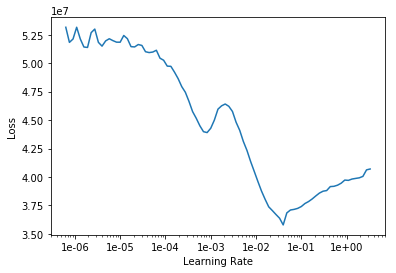

In [158]:
BestLearn.lr_find()
BestLearn.recorder.plot()

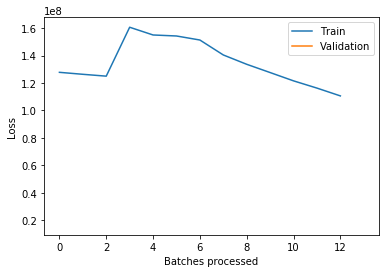

In [157]:
BestLearn.recorder.plot_losses()

In [168]:
BestLearn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(175, 29)
    (1): Embedding(8, 5)
    (2): Embedding(4, 3)
    (3): Embedding(13, 7)
    (4): Embedding(32, 11)
    (5): Embedding(3, 3)
    (6): Embedding(3, 3)
    (7): Embedding(5, 4)
    (8): Embedding(3, 3)
    (9): Embedding(12, 6)
    (10): Embedding(54, 15)
    (11): Embedding(367, 44)
    (12): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.04)
  (bn_cont): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=140, out_features=1400, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(1400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.095)
    (4): Linear(in_features=1400, out_features=1000, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.5)
    (8): Linear(in_features=1000, out_features=1200, bias=True)
   

In [191]:
#{'layer1': 1300.0, 'layer2': 1000.0, 'layer3': 1000.0, 'lr': 0.006, 'wd': 0.1, 'div_factor': 25.0, 'ps1': 0.11, 'ps2': 0.5, 'ps3': 0.49, 'emb_drop': 0.039}
#-1074
param_dist = {
    'layer1':[1200, 1300, 1400], 
    'layer2':[700,1000,1100,1200], 
    'layer3':[600,1000,1100,1200], 
    'lr':[4e-3,5e-3,6e-3,8e-3,9e-3,1e-2,1e-1,1], 
    'wd':[0.1,0.2,0.3,0.4,0.5,0.6], 
    'div_factor':[25,26], 
    'ps1':[0.098,0.099,0.1,0.11,0.12,0.13,0.15,0.5],
    'ps2':[0.5,0.49,0.51,0.6], 
    'ps3':[0.5,0.49,0.51,0.6], 
    'emb_drop':[0.04,0.039,0.041]
}

xs={'layer1': 1300.0, 'layer2': 1000, 'layer3': 1000, 'lr': 0.005, 'wd': 0.1, 'div_factor': 25.0, 'ps1': 0.1, 'ps2': 0.5, 'ps3': 0.49, 'emb_drop': 0.039}
PatternSearch(param_dist, 20, alfa=1.4, metric=5, XevalMetric=mae,xs=xs)

layer1 : [1200, 1300, 1400]
layer2 : [700, 1000, 1100, 1200]
layer3 : [600, 1000, 1100, 1200]
lr : [0.004, 0.005, 0.006, 0.008, 0.009, 0.01, 0.1, 1]
wd : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
div_factor : [25, 26]
ps1 : [0.098, 0.099, 0.1, 0.11, 0.12, 0.13, 0.15, 0.5]
ps2 : [0.49, 0.5, 0.51, 0.6]
ps3 : [0.49, 0.5, 0.51, 0.6]
emb_drop : [0.039, 0.04, 0.041]
{'layer1': 1300.0, 'layer2': 1000, 'layer3': 1000, 'lr': 0.005, 'wd': 0.1, 'div_factor': 25.0, 'ps1': 0.1, 'ps2': 0.5, 'ps3': 0.49, 'emb_drop': 0.039}
Current Model:  Fast.ai Tabular
Training data set shape: (20110, 18)
3355 3351
6706 3351
10057 3351
13408 3351
16759 3351
Cross Validation Time: 145.780338
   layer1  layer2  layer3     lr   wd  div_factor  ps1  ps2   ps3  emb_drop  \
0  1300.0  1000.0  1000.0  0.005  0.1        25.0  0.1  0.5  0.49     0.039   

         score  
0 -1199.050049  
1 {'layer1': 1400, 'layer2': 1000, 'layer3': 1000, 'lr': 0.008, 'wd': 0.3, 'div_factor': 25, 'ps1': 0.11, 'ps2': 0.5, 'ps3': 0.5, 'emb_drop': 0.04}


6706 3351
10057 3351
13408 3351
16759 3351
Cross Validation Time: 176.400090
   layer1  layer2  layer3     lr   wd  div_factor   ps1  ps2   ps3  emb_drop  \
0  1300.0  1000.0  1000.0  0.005  0.1        25.0  0.10  0.5  0.49     0.039   
1  1400.0  1000.0  1000.0  0.008  0.3        25.0  0.11  0.5  0.50     0.040   
2  1400.0  1200.0  1000.0  0.008  0.3        25.0  0.11  0.5  0.50     0.040   
3  1400.0  1200.0  1200.0  0.008  0.3        25.0  0.11  0.5  0.50     0.040   
4  1400.0  1200.0   600.0  0.008  0.3        25.0  0.11  0.5  0.50     0.040   
5  1400.0  1200.0  1000.0  1.000  0.3        25.0  0.11  0.5  0.50     0.040   
6  1400.0  1200.0  1000.0  0.004  0.3        25.0  0.11  0.5  0.50     0.040   
7  1400.0  1200.0  1000.0  0.008  0.6        25.0  0.11  0.5  0.50     0.040   
8  1400.0  1200.0  1000.0  0.008  0.6        26.0  0.11  0.5  0.50     0.040   
9  1400.0  1200.0  1000.0  0.008  0.6        25.0  0.50  0.5  0.50     0.040   

         score  
0 -1199.050049  
1 -1082.

6706 3351
10057 3351
13408 3351
16759 3351
Cross Validation Time: 180.626331
    layer1  layer2  layer3     lr   wd  div_factor    ps1   ps2   ps3  \
0   1300.0  1000.0  1000.0  0.005  0.1        25.0  0.100  0.50  0.49   
1   1400.0  1000.0  1000.0  0.008  0.3        25.0  0.110  0.50  0.50   
2   1400.0  1200.0  1000.0  0.008  0.3        25.0  0.110  0.50  0.50   
3   1400.0  1200.0  1200.0  0.008  0.3        25.0  0.110  0.50  0.50   
4   1400.0  1200.0   600.0  0.008  0.3        25.0  0.110  0.50  0.50   
5   1400.0  1200.0  1000.0  1.000  0.3        25.0  0.110  0.50  0.50   
6   1400.0  1200.0  1000.0  0.004  0.3        25.0  0.110  0.50  0.50   
7   1400.0  1200.0  1000.0  0.008  0.6        25.0  0.110  0.50  0.50   
8   1400.0  1200.0  1000.0  0.008  0.6        26.0  0.110  0.50  0.50   
9   1400.0  1200.0  1000.0  0.008  0.6        25.0  0.500  0.50  0.50   
10  1400.0  1200.0  1000.0  0.008  0.6        25.0  0.098  0.50  0.50   
11  1400.0  1200.0  1000.0  0.008  0.6        2

6706 3351
10057 3351
13408 3351
16759 3351
Cross Validation Time: 168.262624
    layer1  layer2  layer3     lr   wd  div_factor    ps1   ps2   ps3  \
0   1300.0  1000.0  1000.0  0.005  0.1        25.0  0.100  0.50  0.49   
1   1400.0  1000.0  1000.0  0.008  0.3        25.0  0.110  0.50  0.50   
2   1400.0  1200.0  1000.0  0.008  0.3        25.0  0.110  0.50  0.50   
3   1400.0  1200.0  1200.0  0.008  0.3        25.0  0.110  0.50  0.50   
4   1400.0  1200.0   600.0  0.008  0.3        25.0  0.110  0.50  0.50   
5   1400.0  1200.0  1000.0  1.000  0.3        25.0  0.110  0.50  0.50   
6   1400.0  1200.0  1000.0  0.004  0.3        25.0  0.110  0.50  0.50   
7   1400.0  1200.0  1000.0  0.008  0.6        25.0  0.110  0.50  0.50   
8   1400.0  1200.0  1000.0  0.008  0.6        26.0  0.110  0.50  0.50   
9   1400.0  1200.0  1000.0  0.008  0.6        25.0  0.500  0.50  0.50   
10  1400.0  1200.0  1000.0  0.008  0.6        25.0  0.098  0.50  0.50   
11  1400.0  1200.0  1000.0  0.008  0.6        2

6706 3351
10057 3351
13408 3351
16759 3351
Cross Validation Time: 177.621160
    layer1  layer2  layer3     lr   wd  div_factor    ps1   ps2   ps3  \
0   1300.0  1000.0  1000.0  0.005  0.1        25.0  0.100  0.50  0.49   
1   1400.0  1000.0  1000.0  0.008  0.3        25.0  0.110  0.50  0.50   
2   1400.0  1200.0  1000.0  0.008  0.3        25.0  0.110  0.50  0.50   
3   1400.0  1200.0  1200.0  0.008  0.3        25.0  0.110  0.50  0.50   
4   1400.0  1200.0   600.0  0.008  0.3        25.0  0.110  0.50  0.50   
5   1400.0  1200.0  1000.0  1.000  0.3        25.0  0.110  0.50  0.50   
6   1400.0  1200.0  1000.0  0.004  0.3        25.0  0.110  0.50  0.50   
7   1400.0  1200.0  1000.0  0.008  0.6        25.0  0.110  0.50  0.50   
8   1400.0  1200.0  1000.0  0.008  0.6        26.0  0.110  0.50  0.50   
9   1400.0  1200.0  1000.0  0.008  0.6        25.0  0.500  0.50  0.50   
10  1400.0  1200.0  1000.0  0.008  0.6        25.0  0.098  0.50  0.50   
11  1400.0  1200.0  1000.0  0.008  0.6        2

6706 3351
10057 3351
13408 3351
16759 3351
Cross Validation Time: 176.822114
    layer1  layer2  layer3     lr   wd  div_factor    ps1   ps2   ps3  \
0   1300.0  1000.0  1000.0  0.005  0.1        25.0  0.100  0.50  0.49   
1   1400.0  1000.0  1000.0  0.008  0.3        25.0  0.110  0.50  0.50   
2   1400.0  1200.0  1000.0  0.008  0.3        25.0  0.110  0.50  0.50   
3   1400.0  1200.0  1200.0  0.008  0.3        25.0  0.110  0.50  0.50   
4   1400.0  1200.0   600.0  0.008  0.3        25.0  0.110  0.50  0.50   
5   1400.0  1200.0  1000.0  1.000  0.3        25.0  0.110  0.50  0.50   
6   1400.0  1200.0  1000.0  0.004  0.3        25.0  0.110  0.50  0.50   
7   1400.0  1200.0  1000.0  0.008  0.6        25.0  0.110  0.50  0.50   
8   1400.0  1200.0  1000.0  0.008  0.6        26.0  0.110  0.50  0.50   
9   1400.0  1200.0  1000.0  0.008  0.6        25.0  0.500  0.50  0.50   
10  1400.0  1200.0  1000.0  0.008  0.6        25.0  0.098  0.50  0.50   
11  1400.0  1200.0  1000.0  0.008  0.6        2

6706 3351
10057 3351
13408 3351
16759 3351
Cross Validation Time: 177.654161
    layer1  layer2  layer3     lr   wd  div_factor    ps1   ps2   ps3  \
0   1300.0  1000.0  1000.0  0.005  0.1        25.0  0.100  0.50  0.49   
1   1400.0  1000.0  1000.0  0.008  0.3        25.0  0.110  0.50  0.50   
2   1400.0  1200.0  1000.0  0.008  0.3        25.0  0.110  0.50  0.50   
3   1400.0  1200.0  1200.0  0.008  0.3        25.0  0.110  0.50  0.50   
4   1400.0  1200.0   600.0  0.008  0.3        25.0  0.110  0.50  0.50   
5   1400.0  1200.0  1000.0  1.000  0.3        25.0  0.110  0.50  0.50   
6   1400.0  1200.0  1000.0  0.004  0.3        25.0  0.110  0.50  0.50   
7   1400.0  1200.0  1000.0  0.008  0.6        25.0  0.110  0.50  0.50   
8   1400.0  1200.0  1000.0  0.008  0.6        26.0  0.110  0.50  0.50   
9   1400.0  1200.0  1000.0  0.008  0.6        25.0  0.500  0.50  0.50   
10  1400.0  1200.0  1000.0  0.008  0.6        25.0  0.098  0.50  0.50   
11  1400.0  1200.0  1000.0  0.008  0.6        2

6706 3351
10057 3351
13408 3351
16759 3351
Cross Validation Time: 176.835114
    layer1  layer2  layer3     lr   wd  div_factor    ps1   ps2   ps3  \
0   1300.0  1000.0  1000.0  0.005  0.1        25.0  0.100  0.50  0.49   
1   1400.0  1000.0  1000.0  0.008  0.3        25.0  0.110  0.50  0.50   
2   1400.0  1200.0  1000.0  0.008  0.3        25.0  0.110  0.50  0.50   
3   1400.0  1200.0  1200.0  0.008  0.3        25.0  0.110  0.50  0.50   
4   1400.0  1200.0   600.0  0.008  0.3        25.0  0.110  0.50  0.50   
5   1400.0  1200.0  1000.0  1.000  0.3        25.0  0.110  0.50  0.50   
6   1400.0  1200.0  1000.0  0.004  0.3        25.0  0.110  0.50  0.50   
7   1400.0  1200.0  1000.0  0.008  0.6        25.0  0.110  0.50  0.50   
8   1400.0  1200.0  1000.0  0.008  0.6        26.0  0.110  0.50  0.50   
9   1400.0  1200.0  1000.0  0.008  0.6        25.0  0.500  0.50  0.50   
10  1400.0  1200.0  1000.0  0.008  0.6        25.0  0.098  0.50  0.50   
11  1400.0  1200.0  1000.0  0.008  0.6        2

6706 3351
10057 3351
13408 3351
16759 3351
Cross Validation Time: 177.155133
    layer1  layer2  layer3     lr   wd  div_factor    ps1   ps2   ps3  \
0   1300.0  1000.0  1000.0  0.005  0.1        25.0  0.100  0.50  0.49   
1   1400.0  1000.0  1000.0  0.008  0.3        25.0  0.110  0.50  0.50   
2   1400.0  1200.0  1000.0  0.008  0.3        25.0  0.110  0.50  0.50   
3   1400.0  1200.0  1200.0  0.008  0.3        25.0  0.110  0.50  0.50   
4   1400.0  1200.0   600.0  0.008  0.3        25.0  0.110  0.50  0.50   
5   1400.0  1200.0  1000.0  1.000  0.3        25.0  0.110  0.50  0.50   
6   1400.0  1200.0  1000.0  0.004  0.3        25.0  0.110  0.50  0.50   
7   1400.0  1200.0  1000.0  0.008  0.6        25.0  0.110  0.50  0.50   
8   1400.0  1200.0  1000.0  0.008  0.6        26.0  0.110  0.50  0.50   
9   1400.0  1200.0  1000.0  0.008  0.6        25.0  0.500  0.50  0.50   
10  1400.0  1200.0  1000.0  0.008  0.6        25.0  0.098  0.50  0.50   
11  1400.0  1200.0  1000.0  0.008  0.6        2

,layer1,layer2,layer3,lr,wd,div_factor,ps1,ps2,ps3,emb_drop,score
7,1400.0,1200.0,1000.0,0.008,0.6,25.0,0.110,0.50,0.50,0.040,-1014.118347
33,1400.0,1200.0,1000.0,0.009,0.6,25.0,0.110,0.50,0.50,0.040,-1019.364258
10,1400.0,1200.0,1000.0,0.008,0.6,25.0,0.098,0.50,0.50,0.040,-1027.032715
22,1400.0,1200.0,1000.0,0.100,0.6,25.0,0.110,0.50,0.50,0.040,-1027.766357
27,1400.0,1200.0,1000.0,0.008,0.6,25.0,0.110,0.50,0.51,0.040,-1028.684937
17,1400.0,1200.0,1000.0,0.010,0.6,25.0,0.120,0.50,0.51,0.041,-1031.762939
28,1400.0,1200.0,1000.0,0.010,0.6,25.0,0.110,0.50,0.50,0.040,-1033.517090
12,1400.0,1200.0,1000.0,0.008,0.6,25.0,0.110,0.49,0.50,0.040,-1033.777954
24,1400.0,1200.0,1000.0,0.008,0.4,25.0,0.110,0.50,0.50,0.040,-1033.807129
30,1400.0,1200.0,1000.0,0.008,0.5,25.0,0.110,0.50,0.50,0.040,-1038.399658


In [199]:
param_dist = {
    'layer1':[1200, 1300, 1400], 
    'layer2':[700,1000,1100,1200], 
    'layer3':[600,1000,1100,1200], 
    'lr':[1e-4,4e-3,5e-3,6e-3,8e-3,9e-3,1e-2,1e-1], 
    'wd':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8], 
    'div_factor':[25,26], 
    'ps1':[0.098,0.099,0.1,0.11,0.12,0.13,0.15,0.5],
    'ps2':[0.5,0.49,0.51,0.6], 
    'ps3':[0.5,0.49,0.51,0.6], 
    'emb_drop':[0.04,0.039,0.041]
}

xs={'layer1': 1400.0, 'layer2': 1200.0, 'layer3': 1000.0, 'lr': 0.008, 'wd': 0.6, 'div_factor': 25.0, 'ps1': 0.11, 'ps2': 0.5, 'ps3': 0.5, 'emb_drop': 0.04}
PatternSearch(param_dist, 100, alfa=1.4, metric=5, XevalMetric=mae,xs=xs)

layer1 : [1200, 1300, 1400]
layer2 : [700, 1000, 1100, 1200]
layer3 : [600, 1000, 1100, 1200]
lr : [0.0001, 0.004, 0.005, 0.006, 0.008, 0.009, 0.01, 0.1]
wd : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
div_factor : [25, 26]
ps1 : [0.098, 0.099, 0.1, 0.11, 0.12, 0.13, 0.15, 0.5]
ps2 : [0.49, 0.5, 0.51, 0.6]
ps3 : [0.49, 0.5, 0.51, 0.6]
emb_drop : [0.039, 0.04, 0.041]
{'layer1': 1400.0, 'layer2': 1200.0, 'layer3': 1000.0, 'lr': 0.008, 'wd': 0.6, 'div_factor': 25.0, 'ps1': 0.11, 'ps2': 0.5, 'ps3': 0.5, 'emb_drop': 0.04}
Current Model:  Fast.ai Tabular
Training data set shape: (100554, 18)
16759 16759
33518 16759
50277 16759
67036 16759
83795 16759
Cross Validation Time: 894.918186
   layer1  layer2  layer3     lr   wd  div_factor   ps1  ps2  ps3  emb_drop  \
0  1400.0  1200.0  1000.0  0.008  0.6        25.0  0.11  0.5  0.5      0.04   

         score  
0 -1235.511963  
1 {'layer1': 1400, 'layer2': 1000, 'layer3': 1000, 'lr': 0.006, 'wd': 0.4, 'div_factor': 25, 'ps1': 0.11, 'ps2': 0.5, 'ps3

33518 16759
50277 16759
67036 16759
83795 16759
Cross Validation Time: 902.831639
   layer1  layer2  layer3      lr   wd  div_factor   ps1  ps2  ps3  emb_drop  \
0  1400.0  1200.0  1000.0  0.0080  0.6        25.0  0.11  0.5  0.5      0.04   
1  1400.0  1000.0  1000.0  0.0060  0.4        25.0  0.11  0.5  0.5      0.04   
2  1400.0  1200.0  1000.0  0.0060  0.4        25.0  0.11  0.5  0.5      0.04   
3  1400.0  1200.0  1200.0  0.0060  0.4        25.0  0.11  0.5  0.5      0.04   
4  1400.0  1200.0   600.0  0.0060  0.4        25.0  0.11  0.5  0.5      0.04   
5  1400.0  1200.0  1000.0  0.1000  0.4        25.0  0.11  0.5  0.5      0.04   
6  1400.0  1200.0  1000.0  0.0001  0.4        25.0  0.11  0.5  0.5      0.04   
7  1400.0  1200.0  1000.0  0.0060  0.8        25.0  0.11  0.5  0.5      0.04   
8  1400.0  1200.0  1000.0  0.0060  0.1        25.0  0.11  0.5  0.5      0.04   
9  1400.0  1200.0  1000.0  0.0060  0.1        26.0  0.11  0.5  0.5      0.04   

         score  
0 -1235.511963  
1 -

33518 16759
50277 16759
67036 16759
83795 16759
Cross Validation Time: 902.961646
    layer1  layer2  layer3      lr   wd  div_factor    ps1   ps2   ps3  \
0   1400.0  1200.0  1000.0  0.0080  0.6        25.0  0.110  0.50  0.50   
1   1400.0  1000.0  1000.0  0.0060  0.4        25.0  0.110  0.50  0.50   
2   1400.0  1200.0  1000.0  0.0060  0.4        25.0  0.110  0.50  0.50   
3   1400.0  1200.0  1200.0  0.0060  0.4        25.0  0.110  0.50  0.50   
4   1400.0  1200.0   600.0  0.0060  0.4        25.0  0.110  0.50  0.50   
5   1400.0  1200.0  1000.0  0.1000  0.4        25.0  0.110  0.50  0.50   
6   1400.0  1200.0  1000.0  0.0001  0.4        25.0  0.110  0.50  0.50   
7   1400.0  1200.0  1000.0  0.0060  0.8        25.0  0.110  0.50  0.50   
8   1400.0  1200.0  1000.0  0.0060  0.1        25.0  0.110  0.50  0.50   
9   1400.0  1200.0  1000.0  0.0060  0.1        26.0  0.110  0.50  0.50   
10  1400.0  1200.0  1000.0  0.0060  0.1        25.0  0.500  0.50  0.50   
11  1400.0  1200.0  1000.0  0.

33518 16759
50277 16759
67036 16759
83795 16759
Cross Validation Time: 887.705774
    layer1  layer2  layer3      lr   wd  div_factor    ps1   ps2   ps3  \
0   1400.0  1200.0  1000.0  0.0080  0.6        25.0  0.110  0.50  0.50   
1   1400.0  1000.0  1000.0  0.0060  0.4        25.0  0.110  0.50  0.50   
2   1400.0  1200.0  1000.0  0.0060  0.4        25.0  0.110  0.50  0.50   
3   1400.0  1200.0  1200.0  0.0060  0.4        25.0  0.110  0.50  0.50   
4   1400.0  1200.0   600.0  0.0060  0.4        25.0  0.110  0.50  0.50   
5   1400.0  1200.0  1000.0  0.1000  0.4        25.0  0.110  0.50  0.50   
6   1400.0  1200.0  1000.0  0.0001  0.4        25.0  0.110  0.50  0.50   
7   1400.0  1200.0  1000.0  0.0060  0.8        25.0  0.110  0.50  0.50   
8   1400.0  1200.0  1000.0  0.0060  0.1        25.0  0.110  0.50  0.50   
9   1400.0  1200.0  1000.0  0.0060  0.1        26.0  0.110  0.50  0.50   
10  1400.0  1200.0  1000.0  0.0060  0.1        25.0  0.500  0.50  0.50   
11  1400.0  1200.0  1000.0  0.

33518 16759
50277 16759
67036 16759
83795 16759
Cross Validation Time: 853.618824
    layer1  layer2  layer3      lr   wd  div_factor    ps1   ps2   ps3  \
0   1400.0  1200.0  1000.0  0.0080  0.6        25.0  0.110  0.50  0.50   
1   1400.0  1000.0  1000.0  0.0060  0.4        25.0  0.110  0.50  0.50   
2   1400.0  1200.0  1000.0  0.0060  0.4        25.0  0.110  0.50  0.50   
3   1400.0  1200.0  1200.0  0.0060  0.4        25.0  0.110  0.50  0.50   
4   1400.0  1200.0   600.0  0.0060  0.4        25.0  0.110  0.50  0.50   
5   1400.0  1200.0  1000.0  0.1000  0.4        25.0  0.110  0.50  0.50   
6   1400.0  1200.0  1000.0  0.0001  0.4        25.0  0.110  0.50  0.50   
7   1400.0  1200.0  1000.0  0.0060  0.8        25.0  0.110  0.50  0.50   
8   1400.0  1200.0  1000.0  0.0060  0.1        25.0  0.110  0.50  0.50   
9   1400.0  1200.0  1000.0  0.0060  0.1        26.0  0.110  0.50  0.50   
10  1400.0  1200.0  1000.0  0.0060  0.1        25.0  0.500  0.50  0.50   
11  1400.0  1200.0  1000.0  0.

33518 16759
50277 16759
67036 16759
83795 16759
Cross Validation Time: 850.811664
    layer1  layer2  layer3      lr   wd  div_factor    ps1   ps2   ps3  \
0   1400.0  1200.0  1000.0  0.0080  0.6        25.0  0.110  0.50  0.50   
1   1400.0  1000.0  1000.0  0.0060  0.4        25.0  0.110  0.50  0.50   
2   1400.0  1200.0  1000.0  0.0060  0.4        25.0  0.110  0.50  0.50   
3   1400.0  1200.0  1200.0  0.0060  0.4        25.0  0.110  0.50  0.50   
4   1400.0  1200.0   600.0  0.0060  0.4        25.0  0.110  0.50  0.50   
5   1400.0  1200.0  1000.0  0.1000  0.4        25.0  0.110  0.50  0.50   
6   1400.0  1200.0  1000.0  0.0001  0.4        25.0  0.110  0.50  0.50   
7   1400.0  1200.0  1000.0  0.0060  0.8        25.0  0.110  0.50  0.50   
8   1400.0  1200.0  1000.0  0.0060  0.1        25.0  0.110  0.50  0.50   
9   1400.0  1200.0  1000.0  0.0060  0.1        26.0  0.110  0.50  0.50   
10  1400.0  1200.0  1000.0  0.0060  0.1        25.0  0.500  0.50  0.50   
11  1400.0  1200.0  1000.0  0.

33518 16759
50277 16759
67036 16759
83795 16759
Cross Validation Time: 854.944900
    layer1  layer2  layer3      lr   wd  div_factor    ps1   ps2   ps3  \
0   1400.0  1200.0  1000.0  0.0080  0.6        25.0  0.110  0.50  0.50   
1   1400.0  1000.0  1000.0  0.0060  0.4        25.0  0.110  0.50  0.50   
2   1400.0  1200.0  1000.0  0.0060  0.4        25.0  0.110  0.50  0.50   
3   1400.0  1200.0  1200.0  0.0060  0.4        25.0  0.110  0.50  0.50   
4   1400.0  1200.0   600.0  0.0060  0.4        25.0  0.110  0.50  0.50   
5   1400.0  1200.0  1000.0  0.1000  0.4        25.0  0.110  0.50  0.50   
6   1400.0  1200.0  1000.0  0.0001  0.4        25.0  0.110  0.50  0.50   
7   1400.0  1200.0  1000.0  0.0060  0.8        25.0  0.110  0.50  0.50   
8   1400.0  1200.0  1000.0  0.0060  0.1        25.0  0.110  0.50  0.50   
9   1400.0  1200.0  1000.0  0.0060  0.1        26.0  0.110  0.50  0.50   
10  1400.0  1200.0  1000.0  0.0060  0.1        25.0  0.500  0.50  0.50   
11  1400.0  1200.0  1000.0  0.

33518 16759
50277 16759
67036 16759
83795 16759
Cross Validation Time: 839.504017
    layer1  layer2  layer3      lr   wd  div_factor    ps1   ps2   ps3  \
0   1400.0  1200.0  1000.0  0.0080  0.6        25.0  0.110  0.50  0.50   
1   1400.0  1000.0  1000.0  0.0060  0.4        25.0  0.110  0.50  0.50   
2   1400.0  1200.0  1000.0  0.0060  0.4        25.0  0.110  0.50  0.50   
3   1400.0  1200.0  1200.0  0.0060  0.4        25.0  0.110  0.50  0.50   
4   1400.0  1200.0   600.0  0.0060  0.4        25.0  0.110  0.50  0.50   
5   1400.0  1200.0  1000.0  0.1000  0.4        25.0  0.110  0.50  0.50   
6   1400.0  1200.0  1000.0  0.0001  0.4        25.0  0.110  0.50  0.50   
7   1400.0  1200.0  1000.0  0.0060  0.8        25.0  0.110  0.50  0.50   
8   1400.0  1200.0  1000.0  0.0060  0.1        25.0  0.110  0.50  0.50   
9   1400.0  1200.0  1000.0  0.0060  0.1        26.0  0.110  0.50  0.50   
10  1400.0  1200.0  1000.0  0.0060  0.1        25.0  0.500  0.50  0.50   
11  1400.0  1200.0  1000.0  0.

33518 16759
50277 16759
67036 16759
83795 16759
Cross Validation Time: 806.980156
    layer1  layer2  layer3      lr   wd  div_factor    ps1   ps2   ps3  \
0   1400.0  1200.0  1000.0  0.0080  0.6        25.0  0.110  0.50  0.50   
1   1400.0  1000.0  1000.0  0.0060  0.4        25.0  0.110  0.50  0.50   
2   1400.0  1200.0  1000.0  0.0060  0.4        25.0  0.110  0.50  0.50   
3   1400.0  1200.0  1200.0  0.0060  0.4        25.0  0.110  0.50  0.50   
4   1400.0  1200.0   600.0  0.0060  0.4        25.0  0.110  0.50  0.50   
5   1400.0  1200.0  1000.0  0.1000  0.4        25.0  0.110  0.50  0.50   
6   1400.0  1200.0  1000.0  0.0001  0.4        25.0  0.110  0.50  0.50   
7   1400.0  1200.0  1000.0  0.0060  0.8        25.0  0.110  0.50  0.50   
8   1400.0  1200.0  1000.0  0.0060  0.1        25.0  0.110  0.50  0.50   
9   1400.0  1200.0  1000.0  0.0060  0.1        26.0  0.110  0.50  0.50   
10  1400.0  1200.0  1000.0  0.0060  0.1        25.0  0.500  0.50  0.50   
11  1400.0  1200.0  1000.0  0.

33518 16759
50277 16759
67036 16759
83795 16759
Cross Validation Time: 741.028384
    layer1  layer2  layer3      lr   wd  div_factor    ps1   ps2   ps3  \
0   1400.0  1200.0  1000.0  0.0080  0.6        25.0  0.110  0.50  0.50   
1   1400.0  1000.0  1000.0  0.0060  0.4        25.0  0.110  0.50  0.50   
2   1400.0  1200.0  1000.0  0.0060  0.4        25.0  0.110  0.50  0.50   
3   1400.0  1200.0  1200.0  0.0060  0.4        25.0  0.110  0.50  0.50   
4   1400.0  1200.0   600.0  0.0060  0.4        25.0  0.110  0.50  0.50   
5   1400.0  1200.0  1000.0  0.1000  0.4        25.0  0.110  0.50  0.50   
6   1400.0  1200.0  1000.0  0.0001  0.4        25.0  0.110  0.50  0.50   
7   1400.0  1200.0  1000.0  0.0060  0.8        25.0  0.110  0.50  0.50   
8   1400.0  1200.0  1000.0  0.0060  0.1        25.0  0.110  0.50  0.50   
9   1400.0  1200.0  1000.0  0.0060  0.1        26.0  0.110  0.50  0.50   
10  1400.0  1200.0  1000.0  0.0060  0.1        25.0  0.500  0.50  0.50   
11  1400.0  1200.0  1000.0  0.

33518 16759
50277 16759
67036 16759
83795 16759
Cross Validation Time: 892.878070
    layer1  layer2  layer3      lr   wd  div_factor    ps1   ps2   ps3  \
0   1400.0  1200.0  1000.0  0.0080  0.6        25.0  0.110  0.50  0.50   
1   1400.0  1000.0  1000.0  0.0060  0.4        25.0  0.110  0.50  0.50   
2   1400.0  1200.0  1000.0  0.0060  0.4        25.0  0.110  0.50  0.50   
3   1400.0  1200.0  1200.0  0.0060  0.4        25.0  0.110  0.50  0.50   
4   1400.0  1200.0   600.0  0.0060  0.4        25.0  0.110  0.50  0.50   
5   1400.0  1200.0  1000.0  0.1000  0.4        25.0  0.110  0.50  0.50   
6   1400.0  1200.0  1000.0  0.0001  0.4        25.0  0.110  0.50  0.50   
7   1400.0  1200.0  1000.0  0.0060  0.8        25.0  0.110  0.50  0.50   
8   1400.0  1200.0  1000.0  0.0060  0.1        25.0  0.110  0.50  0.50   
9   1400.0  1200.0  1000.0  0.0060  0.1        26.0  0.110  0.50  0.50   
10  1400.0  1200.0  1000.0  0.0060  0.1        25.0  0.500  0.50  0.50   
11  1400.0  1200.0  1000.0  0.

33518 16759
50277 16759
67036 16759
83795 16759
Cross Validation Time: 855.630939
    layer1  layer2  layer3      lr   wd  div_factor    ps1   ps2   ps3  \
0   1400.0  1200.0  1000.0  0.0080  0.6        25.0  0.110  0.50  0.50   
1   1400.0  1000.0  1000.0  0.0060  0.4        25.0  0.110  0.50  0.50   
2   1400.0  1200.0  1000.0  0.0060  0.4        25.0  0.110  0.50  0.50   
3   1400.0  1200.0  1200.0  0.0060  0.4        25.0  0.110  0.50  0.50   
4   1400.0  1200.0   600.0  0.0060  0.4        25.0  0.110  0.50  0.50   
5   1400.0  1200.0  1000.0  0.1000  0.4        25.0  0.110  0.50  0.50   
6   1400.0  1200.0  1000.0  0.0001  0.4        25.0  0.110  0.50  0.50   
7   1400.0  1200.0  1000.0  0.0060  0.8        25.0  0.110  0.50  0.50   
8   1400.0  1200.0  1000.0  0.0060  0.1        25.0  0.110  0.50  0.50   
9   1400.0  1200.0  1000.0  0.0060  0.1        26.0  0.110  0.50  0.50   
10  1400.0  1200.0  1000.0  0.0060  0.1        25.0  0.500  0.50  0.50   
11  1400.0  1200.0  1000.0  0.

33518 16759
50277 16759
67036 16759
83795 16759
Cross Validation Time: 853.417813
    layer1  layer2  layer3      lr   wd  div_factor    ps1   ps2   ps3  \
0   1400.0  1200.0  1000.0  0.0080  0.6        25.0  0.110  0.50  0.50   
1   1400.0  1000.0  1000.0  0.0060  0.4        25.0  0.110  0.50  0.50   
2   1400.0  1200.0  1000.0  0.0060  0.4        25.0  0.110  0.50  0.50   
3   1400.0  1200.0  1200.0  0.0060  0.4        25.0  0.110  0.50  0.50   
4   1400.0  1200.0   600.0  0.0060  0.4        25.0  0.110  0.50  0.50   
5   1400.0  1200.0  1000.0  0.1000  0.4        25.0  0.110  0.50  0.50   
6   1400.0  1200.0  1000.0  0.0001  0.4        25.0  0.110  0.50  0.50   
7   1400.0  1200.0  1000.0  0.0060  0.8        25.0  0.110  0.50  0.50   
8   1400.0  1200.0  1000.0  0.0060  0.1        25.0  0.110  0.50  0.50   
9   1400.0  1200.0  1000.0  0.0060  0.1        26.0  0.110  0.50  0.50   
10  1400.0  1200.0  1000.0  0.0060  0.1        25.0  0.500  0.50  0.50   
11  1400.0  1200.0  1000.0  0.

33518 16759
50277 16759
67036 16759
83795 16759
Cross Validation Time: 856.445986
    layer1  layer2  layer3      lr   wd  div_factor    ps1   ps2   ps3  \
0   1400.0  1200.0  1000.0  0.0080  0.6        25.0  0.110  0.50  0.50   
1   1400.0  1000.0  1000.0  0.0060  0.4        25.0  0.110  0.50  0.50   
2   1400.0  1200.0  1000.0  0.0060  0.4        25.0  0.110  0.50  0.50   
3   1400.0  1200.0  1200.0  0.0060  0.4        25.0  0.110  0.50  0.50   
4   1400.0  1200.0   600.0  0.0060  0.4        25.0  0.110  0.50  0.50   
5   1400.0  1200.0  1000.0  0.1000  0.4        25.0  0.110  0.50  0.50   
6   1400.0  1200.0  1000.0  0.0001  0.4        25.0  0.110  0.50  0.50   
7   1400.0  1200.0  1000.0  0.0060  0.8        25.0  0.110  0.50  0.50   
8   1400.0  1200.0  1000.0  0.0060  0.1        25.0  0.110  0.50  0.50   
9   1400.0  1200.0  1000.0  0.0060  0.1        26.0  0.110  0.50  0.50   
10  1400.0  1200.0  1000.0  0.0060  0.1        25.0  0.500  0.50  0.50   
11  1400.0  1200.0  1000.0  0.

33518 16759
50277 16759
67036 16759
83795 16759
Cross Validation Time: 850.752660
    layer1  layer2  layer3      lr   wd  div_factor    ps1   ps2   ps3  \
0   1400.0  1200.0  1000.0  0.0080  0.6        25.0  0.110  0.50  0.50   
1   1400.0  1000.0  1000.0  0.0060  0.4        25.0  0.110  0.50  0.50   
2   1400.0  1200.0  1000.0  0.0060  0.4        25.0  0.110  0.50  0.50   
3   1400.0  1200.0  1200.0  0.0060  0.4        25.0  0.110  0.50  0.50   
4   1400.0  1200.0   600.0  0.0060  0.4        25.0  0.110  0.50  0.50   
5   1400.0  1200.0  1000.0  0.1000  0.4        25.0  0.110  0.50  0.50   
6   1400.0  1200.0  1000.0  0.0001  0.4        25.0  0.110  0.50  0.50   
7   1400.0  1200.0  1000.0  0.0060  0.8        25.0  0.110  0.50  0.50   
8   1400.0  1200.0  1000.0  0.0060  0.1        25.0  0.110  0.50  0.50   
9   1400.0  1200.0  1000.0  0.0060  0.1        26.0  0.110  0.50  0.50   
10  1400.0  1200.0  1000.0  0.0060  0.1        25.0  0.500  0.50  0.50   
11  1400.0  1200.0  1000.0  0.

33518 16759
50277 16759
67036 16759
83795 16759
Cross Validation Time: 884.952616
    layer1  layer2  layer3      lr   wd  div_factor    ps1   ps2   ps3  \
0   1400.0  1200.0  1000.0  0.0080  0.6        25.0  0.110  0.50  0.50   
1   1400.0  1000.0  1000.0  0.0060  0.4        25.0  0.110  0.50  0.50   
2   1400.0  1200.0  1000.0  0.0060  0.4        25.0  0.110  0.50  0.50   
3   1400.0  1200.0  1200.0  0.0060  0.4        25.0  0.110  0.50  0.50   
4   1400.0  1200.0   600.0  0.0060  0.4        25.0  0.110  0.50  0.50   
5   1400.0  1200.0  1000.0  0.1000  0.4        25.0  0.110  0.50  0.50   
6   1400.0  1200.0  1000.0  0.0001  0.4        25.0  0.110  0.50  0.50   
7   1400.0  1200.0  1000.0  0.0060  0.8        25.0  0.110  0.50  0.50   
8   1400.0  1200.0  1000.0  0.0060  0.1        25.0  0.110  0.50  0.50   
9   1400.0  1200.0  1000.0  0.0060  0.1        26.0  0.110  0.50  0.50   
10  1400.0  1200.0  1000.0  0.0060  0.1        25.0  0.500  0.50  0.50   
11  1400.0  1200.0  1000.0  0.

33518 16759
50277 16759
67036 16759
83795 16759
Cross Validation Time: 870.930815
    layer1  layer2  layer3      lr   wd  div_factor    ps1   ps2   ps3  \
0   1400.0  1200.0  1000.0  0.0080  0.6        25.0  0.110  0.50  0.50   
1   1400.0  1000.0  1000.0  0.0060  0.4        25.0  0.110  0.50  0.50   
2   1400.0  1200.0  1000.0  0.0060  0.4        25.0  0.110  0.50  0.50   
3   1400.0  1200.0  1200.0  0.0060  0.4        25.0  0.110  0.50  0.50   
4   1400.0  1200.0   600.0  0.0060  0.4        25.0  0.110  0.50  0.50   
5   1400.0  1200.0  1000.0  0.1000  0.4        25.0  0.110  0.50  0.50   
6   1400.0  1200.0  1000.0  0.0001  0.4        25.0  0.110  0.50  0.50   
7   1400.0  1200.0  1000.0  0.0060  0.8        25.0  0.110  0.50  0.50   
8   1400.0  1200.0  1000.0  0.0060  0.1        25.0  0.110  0.50  0.50   
9   1400.0  1200.0  1000.0  0.0060  0.1        26.0  0.110  0.50  0.50   
10  1400.0  1200.0  1000.0  0.0060  0.1        25.0  0.500  0.50  0.50   
11  1400.0  1200.0  1000.0  0.

33518 16759
50277 16759
67036 16759
83795 16759
Cross Validation Time: 860.045192
    layer1  layer2  layer3      lr   wd  div_factor    ps1   ps2   ps3  \
0   1400.0  1200.0  1000.0  0.0080  0.6        25.0  0.110  0.50  0.50   
1   1400.0  1000.0  1000.0  0.0060  0.4        25.0  0.110  0.50  0.50   
2   1400.0  1200.0  1000.0  0.0060  0.4        25.0  0.110  0.50  0.50   
3   1400.0  1200.0  1200.0  0.0060  0.4        25.0  0.110  0.50  0.50   
4   1400.0  1200.0   600.0  0.0060  0.4        25.0  0.110  0.50  0.50   
5   1400.0  1200.0  1000.0  0.1000  0.4        25.0  0.110  0.50  0.50   
6   1400.0  1200.0  1000.0  0.0001  0.4        25.0  0.110  0.50  0.50   
7   1400.0  1200.0  1000.0  0.0060  0.8        25.0  0.110  0.50  0.50   
8   1400.0  1200.0  1000.0  0.0060  0.1        25.0  0.110  0.50  0.50   
9   1400.0  1200.0  1000.0  0.0060  0.1        26.0  0.110  0.50  0.50   
10  1400.0  1200.0  1000.0  0.0060  0.1        25.0  0.500  0.50  0.50   
11  1400.0  1200.0  1000.0  0.

33518 16759
50277 16759
67036 16759
83795 16759
Cross Validation Time: 849.586594
    layer1  layer2  layer3      lr   wd  div_factor    ps1   ps2   ps3  \
0   1400.0  1200.0  1000.0  0.0080  0.6        25.0  0.110  0.50  0.50   
1   1400.0  1000.0  1000.0  0.0060  0.4        25.0  0.110  0.50  0.50   
2   1400.0  1200.0  1000.0  0.0060  0.4        25.0  0.110  0.50  0.50   
3   1400.0  1200.0  1200.0  0.0060  0.4        25.0  0.110  0.50  0.50   
4   1400.0  1200.0   600.0  0.0060  0.4        25.0  0.110  0.50  0.50   
5   1400.0  1200.0  1000.0  0.1000  0.4        25.0  0.110  0.50  0.50   
6   1400.0  1200.0  1000.0  0.0001  0.4        25.0  0.110  0.50  0.50   
7   1400.0  1200.0  1000.0  0.0060  0.8        25.0  0.110  0.50  0.50   
8   1400.0  1200.0  1000.0  0.0060  0.1        25.0  0.110  0.50  0.50   
9   1400.0  1200.0  1000.0  0.0060  0.1        26.0  0.110  0.50  0.50   
10  1400.0  1200.0  1000.0  0.0060  0.1        25.0  0.500  0.50  0.50   
11  1400.0  1200.0  1000.0  0.

,layer1,layer2,layer3,lr,wd,div_factor,ps1,ps2,ps3,emb_drop,score
39,1300.0,1200.0,1000.0,0.0040,0.1,26.0,0.098,0.50,0.50,0.039,-1128.493652
42,1300.0,1200.0,1000.0,0.0040,0.1,26.0,0.100,0.50,0.50,0.039,-1132.333252
30,1300.0,1200.0,1000.0,0.0060,0.1,26.0,0.098,0.50,0.50,0.039,-1132.548706
45,1300.0,1200.0,1000.0,0.0040,0.1,26.0,0.098,0.50,0.51,0.039,-1137.516357
26,1300.0,1200.0,1000.0,0.0060,0.1,26.0,0.098,0.50,0.49,0.039,-1137.673828
31,1300.0,1200.0,1000.0,0.0060,0.1,26.0,0.098,0.50,0.50,0.040,-1138.993774
27,1300.0,1200.0,1000.0,0.0060,0.1,26.0,0.110,0.50,0.49,0.039,-1139.781982
33,1400.0,1200.0,1000.0,0.0060,0.1,26.0,0.098,0.50,0.50,0.039,-1140.949585
53,1300.0,1200.0,1000.0,0.0050,0.1,26.0,0.098,0.50,0.50,0.039,-1140.973877
19,1300.0,1200.0,1000.0,0.0060,0.1,25.0,0.098,0.50,0.49,0.039,-1141.213135


In [196]:
BestLearn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


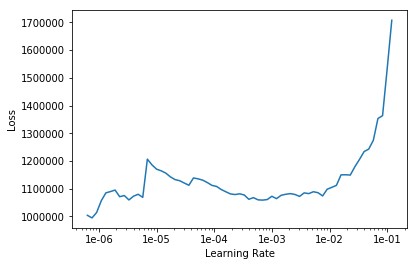

In [197]:
BestLearn.recorder.plot()

In [31]:
#Two Layer tests:
 
param_dist = {
    'layer1':[1000,1200, 1300, 1400, 2000], 
    'layer2':[500,700,1000,1100,1200,1600, 2000], 
    'lr':[1e-4,1e-3,3e-3,5e-3,6e-3,8e-3,9e-3,1e-2,1e-1], 
    'wd':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8], 
    'div_factor':[25,26], 
    'ps1':[0.001,0.8,0.9,0.098,0.099,0.1,0.11,0.12,0.13,0.15,0.5],
    'ps2':[0.01,0.5,0.49,0.51,0.6], 
    'emb_drop':[0.03,0.04,0.039,0.041,0.05]
}

xs={'layer1': 1400.0, 'layer2': 1200.0, 'lr': 0.008, 'wd': 0.6, 'div_factor': 25.0, 'ps1': 0.11, 'ps2': 0.5, 'emb_drop': 0.04}
PatternSearch(param_dist, 100, alfa=1.4, metric=7, XevalMetric=mae,xs=xs)

layer1 : [1000, 1200, 1300, 1400, 2000]
layer2 : [500, 700, 1000, 1100, 1200, 1600, 2000]
lr : [0.0001, 0.001, 0.003, 0.005, 0.006, 0.008, 0.009, 0.01, 0.1]
wd : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
div_factor : [25, 26]
ps1 : [0.001, 0.098, 0.099, 0.1, 0.11, 0.12, 0.13, 0.15, 0.5, 0.8, 0.9]
ps2 : [0.01, 0.49, 0.5, 0.51, 0.6]
emb_drop : [0.03, 0.039, 0.04, 0.041, 0.05]
{'layer1': 1400.0, 'layer2': 1200.0, 'lr': 0.008, 'wd': 0.6, 'div_factor': 25.0, 'ps1': 0.11, 'ps2': 0.5, 'emb_drop': 0.04}
Current Model:  Fast.ai Tabular
Training data set shape: (100554, 18)
16759 16759
33518 16759
50277 16759
67036 16759
83795 16759
Cross Validation Time: 620.579495
   layer1  layer2     lr   wd  div_factor   ps1  ps2  emb_drop       score
0  1400.0  1200.0  0.008  0.6        25.0  0.11  0.5      0.04 -1075.94165
1 {'layer1': 2000, 'layer2': 1100, 'lr': 0.006, 'wd': 0.4, 'div_factor': 25, 'ps1': 0.12, 'ps2': 0.5, 'emb_drop': 0.04}
Current Model:  Fast.ai Tabular
Training data set shape: (100554, 

33518 16759
50277 16759
67036 16759
83795 16759
Cross Validation Time: 762.589617
    layer1  layer2      lr   wd  div_factor    ps1  ps2  emb_drop        score
0   1400.0  1200.0  0.0080  0.6        25.0  0.110  0.5      0.04 -1075.941650
1   2000.0  1100.0  0.0060  0.4        25.0  0.120  0.5      0.04 -1051.209839
2   2000.0  2000.0  0.0060  0.4        25.0  0.120  0.5      0.04 -1082.475830
3   2000.0   500.0  0.0060  0.4        25.0  0.120  0.5      0.04 -1068.104858
4   2000.0  1100.0  0.1000  0.4        25.0  0.120  0.5      0.04 -1132.706909
5   2000.0  1100.0  0.0001  0.4        25.0  0.120  0.5      0.04 -1630.354492
6   2000.0  1100.0  0.0060  0.8        25.0  0.120  0.5      0.04 -1093.173950
7   2000.0  1100.0  0.0060  0.1        25.0  0.120  0.5      0.04 -1014.079102
8   2000.0  1100.0  0.0060  0.1        26.0  0.120  0.5      0.04 -1022.683594
9   2000.0  1100.0  0.0060  0.1        25.0  0.900  0.5      0.04 -1070.824829
10  2000.0  1100.0  0.0060  0.1        25.0  0.00

33518 16759
50277 16759
67036 16759
83795 16759
Cross Validation Time: 601.493403
    layer1  layer2      lr   wd  div_factor    ps1   ps2  emb_drop  \
0   1400.0  1200.0  0.0080  0.6        25.0  0.110  0.50      0.04   
1   2000.0  1100.0  0.0060  0.4        25.0  0.120  0.50      0.04   
2   2000.0  2000.0  0.0060  0.4        25.0  0.120  0.50      0.04   
3   2000.0   500.0  0.0060  0.4        25.0  0.120  0.50      0.04   
4   2000.0  1100.0  0.1000  0.4        25.0  0.120  0.50      0.04   
5   2000.0  1100.0  0.0001  0.4        25.0  0.120  0.50      0.04   
6   2000.0  1100.0  0.0060  0.8        25.0  0.120  0.50      0.04   
7   2000.0  1100.0  0.0060  0.1        25.0  0.120  0.50      0.04   
8   2000.0  1100.0  0.0060  0.1        26.0  0.120  0.50      0.04   
9   2000.0  1100.0  0.0060  0.1        25.0  0.900  0.50      0.04   
10  2000.0  1100.0  0.0060  0.1        25.0  0.001  0.50      0.04   
11  2000.0  1100.0  0.0060  0.1        25.0  0.120  0.60      0.04   
12  2000

33518 16759
50277 16759
67036 16759
83795 16759
Cross Validation Time: 762.962639
    layer1  layer2      lr   wd  div_factor    ps1   ps2  emb_drop  \
0   1400.0  1200.0  0.0080  0.6        25.0  0.110  0.50      0.04   
1   2000.0  1100.0  0.0060  0.4        25.0  0.120  0.50      0.04   
2   2000.0  2000.0  0.0060  0.4        25.0  0.120  0.50      0.04   
3   2000.0   500.0  0.0060  0.4        25.0  0.120  0.50      0.04   
4   2000.0  1100.0  0.1000  0.4        25.0  0.120  0.50      0.04   
5   2000.0  1100.0  0.0001  0.4        25.0  0.120  0.50      0.04   
6   2000.0  1100.0  0.0060  0.8        25.0  0.120  0.50      0.04   
7   2000.0  1100.0  0.0060  0.1        25.0  0.120  0.50      0.04   
8   2000.0  1100.0  0.0060  0.1        26.0  0.120  0.50      0.04   
9   2000.0  1100.0  0.0060  0.1        25.0  0.900  0.50      0.04   
10  2000.0  1100.0  0.0060  0.1        25.0  0.001  0.50      0.04   
11  2000.0  1100.0  0.0060  0.1        25.0  0.120  0.60      0.04   
12  2000

33518 16759
50277 16759
67036 16759
83795 16759
Cross Validation Time: 765.834803
    layer1  layer2      lr   wd  div_factor    ps1   ps2  emb_drop  \
0   1400.0  1200.0  0.0080  0.6        25.0  0.110  0.50     0.040   
1   2000.0  1100.0  0.0060  0.4        25.0  0.120  0.50     0.040   
2   2000.0  2000.0  0.0060  0.4        25.0  0.120  0.50     0.040   
3   2000.0   500.0  0.0060  0.4        25.0  0.120  0.50     0.040   
4   2000.0  1100.0  0.1000  0.4        25.0  0.120  0.50     0.040   
5   2000.0  1100.0  0.0001  0.4        25.0  0.120  0.50     0.040   
6   2000.0  1100.0  0.0060  0.8        25.0  0.120  0.50     0.040   
7   2000.0  1100.0  0.0060  0.1        25.0  0.120  0.50     0.040   
8   2000.0  1100.0  0.0060  0.1        26.0  0.120  0.50     0.040   
9   2000.0  1100.0  0.0060  0.1        25.0  0.900  0.50     0.040   
10  2000.0  1100.0  0.0060  0.1        25.0  0.001  0.50     0.040   
11  2000.0  1100.0  0.0060  0.1        25.0  0.120  0.60     0.040   
12  2000

33518 16759
50277 16759
67036 16759
83795 16759
Cross Validation Time: 715.025897
    layer1  layer2      lr   wd  div_factor    ps1   ps2  emb_drop  \
0   1400.0  1200.0  0.0080  0.6        25.0  0.110  0.50     0.040   
1   2000.0  1100.0  0.0060  0.4        25.0  0.120  0.50     0.040   
2   2000.0  2000.0  0.0060  0.4        25.0  0.120  0.50     0.040   
3   2000.0   500.0  0.0060  0.4        25.0  0.120  0.50     0.040   
4   2000.0  1100.0  0.1000  0.4        25.0  0.120  0.50     0.040   
5   2000.0  1100.0  0.0001  0.4        25.0  0.120  0.50     0.040   
6   2000.0  1100.0  0.0060  0.8        25.0  0.120  0.50     0.040   
7   2000.0  1100.0  0.0060  0.1        25.0  0.120  0.50     0.040   
8   2000.0  1100.0  0.0060  0.1        26.0  0.120  0.50     0.040   
9   2000.0  1100.0  0.0060  0.1        25.0  0.900  0.50     0.040   
10  2000.0  1100.0  0.0060  0.1        25.0  0.001  0.50     0.040   
11  2000.0  1100.0  0.0060  0.1        25.0  0.120  0.60     0.040   
12  2000

33518 16759
50277 16759
67036 16759
83795 16759
Cross Validation Time: 769.577017
    layer1  layer2      lr   wd  div_factor    ps1   ps2  emb_drop  \
0   1400.0  1200.0  0.0080  0.6        25.0  0.110  0.50     0.040   
1   2000.0  1100.0  0.0060  0.4        25.0  0.120  0.50     0.040   
2   2000.0  2000.0  0.0060  0.4        25.0  0.120  0.50     0.040   
3   2000.0   500.0  0.0060  0.4        25.0  0.120  0.50     0.040   
4   2000.0  1100.0  0.1000  0.4        25.0  0.120  0.50     0.040   
5   2000.0  1100.0  0.0001  0.4        25.0  0.120  0.50     0.040   
6   2000.0  1100.0  0.0060  0.8        25.0  0.120  0.50     0.040   
7   2000.0  1100.0  0.0060  0.1        25.0  0.120  0.50     0.040   
8   2000.0  1100.0  0.0060  0.1        26.0  0.120  0.50     0.040   
9   2000.0  1100.0  0.0060  0.1        25.0  0.900  0.50     0.040   
10  2000.0  1100.0  0.0060  0.1        25.0  0.001  0.50     0.040   
11  2000.0  1100.0  0.0060  0.1        25.0  0.120  0.60     0.040   
12  2000

33518 16759
50277 16759
67036 16759
83795 16759
Cross Validation Time: 749.507869
    layer1  layer2      lr   wd  div_factor    ps1   ps2  emb_drop  \
0   1400.0  1200.0  0.0080  0.6        25.0  0.110  0.50     0.040   
1   2000.0  1100.0  0.0060  0.4        25.0  0.120  0.50     0.040   
2   2000.0  2000.0  0.0060  0.4        25.0  0.120  0.50     0.040   
3   2000.0   500.0  0.0060  0.4        25.0  0.120  0.50     0.040   
4   2000.0  1100.0  0.1000  0.4        25.0  0.120  0.50     0.040   
5   2000.0  1100.0  0.0001  0.4        25.0  0.120  0.50     0.040   
6   2000.0  1100.0  0.0060  0.8        25.0  0.120  0.50     0.040   
7   2000.0  1100.0  0.0060  0.1        25.0  0.120  0.50     0.040   
8   2000.0  1100.0  0.0060  0.1        26.0  0.120  0.50     0.040   
9   2000.0  1100.0  0.0060  0.1        25.0  0.900  0.50     0.040   
10  2000.0  1100.0  0.0060  0.1        25.0  0.001  0.50     0.040   
11  2000.0  1100.0  0.0060  0.1        25.0  0.120  0.60     0.040   
12  2000

33518 16759
50277 16759
67036 16759
83795 16759
Cross Validation Time: 748.353803
    layer1  layer2      lr   wd  div_factor    ps1   ps2  emb_drop  \
0   1400.0  1200.0  0.0080  0.6        25.0  0.110  0.50     0.040   
1   2000.0  1100.0  0.0060  0.4        25.0  0.120  0.50     0.040   
2   2000.0  2000.0  0.0060  0.4        25.0  0.120  0.50     0.040   
3   2000.0   500.0  0.0060  0.4        25.0  0.120  0.50     0.040   
4   2000.0  1100.0  0.1000  0.4        25.0  0.120  0.50     0.040   
5   2000.0  1100.0  0.0001  0.4        25.0  0.120  0.50     0.040   
6   2000.0  1100.0  0.0060  0.8        25.0  0.120  0.50     0.040   
7   2000.0  1100.0  0.0060  0.1        25.0  0.120  0.50     0.040   
8   2000.0  1100.0  0.0060  0.1        26.0  0.120  0.50     0.040   
9   2000.0  1100.0  0.0060  0.1        25.0  0.900  0.50     0.040   
10  2000.0  1100.0  0.0060  0.1        25.0  0.001  0.50     0.040   
11  2000.0  1100.0  0.0060  0.1        25.0  0.120  0.60     0.040   
12  2000

33518 16759
50277 16759
67036 16759
83795 16759
Cross Validation Time: 796.591562
    layer1  layer2      lr   wd  div_factor    ps1   ps2  emb_drop  \
0   1400.0  1200.0  0.0080  0.6        25.0  0.110  0.50     0.040   
1   2000.0  1100.0  0.0060  0.4        25.0  0.120  0.50     0.040   
2   2000.0  2000.0  0.0060  0.4        25.0  0.120  0.50     0.040   
3   2000.0   500.0  0.0060  0.4        25.0  0.120  0.50     0.040   
4   2000.0  1100.0  0.1000  0.4        25.0  0.120  0.50     0.040   
5   2000.0  1100.0  0.0001  0.4        25.0  0.120  0.50     0.040   
6   2000.0  1100.0  0.0060  0.8        25.0  0.120  0.50     0.040   
7   2000.0  1100.0  0.0060  0.1        25.0  0.120  0.50     0.040   
8   2000.0  1100.0  0.0060  0.1        26.0  0.120  0.50     0.040   
9   2000.0  1100.0  0.0060  0.1        25.0  0.900  0.50     0.040   
10  2000.0  1100.0  0.0060  0.1        25.0  0.001  0.50     0.040   
11  2000.0  1100.0  0.0060  0.1        25.0  0.120  0.60     0.040   
12  2000

33518 16759
50277 16759
67036 16759
83795 16759
Cross Validation Time: 755.144192
    layer1  layer2      lr   wd  div_factor    ps1   ps2  emb_drop  \
0   1400.0  1200.0  0.0080  0.6        25.0  0.110  0.50     0.040   
1   2000.0  1100.0  0.0060  0.4        25.0  0.120  0.50     0.040   
2   2000.0  2000.0  0.0060  0.4        25.0  0.120  0.50     0.040   
3   2000.0   500.0  0.0060  0.4        25.0  0.120  0.50     0.040   
4   2000.0  1100.0  0.1000  0.4        25.0  0.120  0.50     0.040   
5   2000.0  1100.0  0.0001  0.4        25.0  0.120  0.50     0.040   
6   2000.0  1100.0  0.0060  0.8        25.0  0.120  0.50     0.040   
7   2000.0  1100.0  0.0060  0.1        25.0  0.120  0.50     0.040   
8   2000.0  1100.0  0.0060  0.1        26.0  0.120  0.50     0.040   
9   2000.0  1100.0  0.0060  0.1        25.0  0.900  0.50     0.040   
10  2000.0  1100.0  0.0060  0.1        25.0  0.001  0.50     0.040   
11  2000.0  1100.0  0.0060  0.1        25.0  0.120  0.60     0.040   
12  2000

33518 16759
50277 16759
67036 16759
83795 16759
Cross Validation Time: 763.768685
    layer1  layer2      lr   wd  div_factor    ps1   ps2  emb_drop  \
0   1400.0  1200.0  0.0080  0.6        25.0  0.110  0.50     0.040   
1   2000.0  1100.0  0.0060  0.4        25.0  0.120  0.50     0.040   
2   2000.0  2000.0  0.0060  0.4        25.0  0.120  0.50     0.040   
3   2000.0   500.0  0.0060  0.4        25.0  0.120  0.50     0.040   
4   2000.0  1100.0  0.1000  0.4        25.0  0.120  0.50     0.040   
5   2000.0  1100.0  0.0001  0.4        25.0  0.120  0.50     0.040   
6   2000.0  1100.0  0.0060  0.8        25.0  0.120  0.50     0.040   
7   2000.0  1100.0  0.0060  0.1        25.0  0.120  0.50     0.040   
8   2000.0  1100.0  0.0060  0.1        26.0  0.120  0.50     0.040   
9   2000.0  1100.0  0.0060  0.1        25.0  0.900  0.50     0.040   
10  2000.0  1100.0  0.0060  0.1        25.0  0.001  0.50     0.040   
11  2000.0  1100.0  0.0060  0.1        25.0  0.120  0.60     0.040   
12  2000

33518 16759
50277 16759
67036 16759
83795 16759
Cross Validation Time: 760.711510
    layer1  layer2      lr   wd  div_factor    ps1   ps2  emb_drop  \
0   1400.0  1200.0  0.0080  0.6        25.0  0.110  0.50     0.040   
1   2000.0  1100.0  0.0060  0.4        25.0  0.120  0.50     0.040   
2   2000.0  2000.0  0.0060  0.4        25.0  0.120  0.50     0.040   
3   2000.0   500.0  0.0060  0.4        25.0  0.120  0.50     0.040   
4   2000.0  1100.0  0.1000  0.4        25.0  0.120  0.50     0.040   
5   2000.0  1100.0  0.0001  0.4        25.0  0.120  0.50     0.040   
6   2000.0  1100.0  0.0060  0.8        25.0  0.120  0.50     0.040   
7   2000.0  1100.0  0.0060  0.1        25.0  0.120  0.50     0.040   
8   2000.0  1100.0  0.0060  0.1        26.0  0.120  0.50     0.040   
9   2000.0  1100.0  0.0060  0.1        25.0  0.900  0.50     0.040   
10  2000.0  1100.0  0.0060  0.1        25.0  0.001  0.50     0.040   
11  2000.0  1100.0  0.0060  0.1        25.0  0.120  0.60     0.040   
12  2000

,layer1,layer2,lr,wd,div_factor,ps1,ps2,emb_drop,score
33,2000.0,1100.0,0.0060,0.1,25.0,0.099,0.50,0.040,-1012.205872
7,2000.0,1100.0,0.0060,0.1,25.0,0.120,0.50,0.040,-1014.079102
13,2000.0,1100.0,0.0060,0.1,25.0,0.120,0.50,0.050,-1015.726074
26,2000.0,1100.0,0.0060,0.1,25.0,0.120,0.50,0.039,-1016.209656
47,2000.0,1100.0,0.0060,0.1,25.0,0.100,0.50,0.040,-1017.615967
45,2000.0,1100.0,0.0060,0.1,26.0,0.099,0.50,0.040,-1017.966125
24,2000.0,1100.0,0.0060,0.1,25.0,0.120,0.49,0.040,-1018.138000
14,2000.0,1100.0,0.0060,0.1,25.0,0.120,0.50,0.030,-1018.601746
23,2000.0,1100.0,0.0060,0.1,25.0,0.120,0.51,0.040,-1018.606995
19,2000.0,1100.0,0.0100,0.1,25.0,0.120,0.50,0.040,-1018.761169


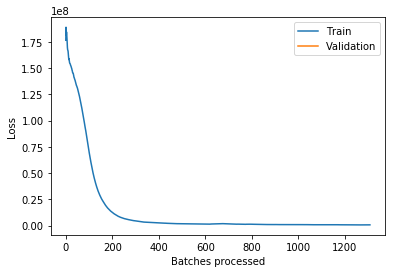

In [34]:
learn.recorder.plot_losses()